<a href="https://colab.research.google.com/github/ch192703/MLFinalProject2024/blob/main/IDS6938_DigitalTwin_Earthquake_Pending_Group_Review_11_30(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Earthquake Prediction Tool**


## **Overview**

The Earthquake Prediction Pipeline is a comprehensive system that automates the collection, processing, and analysis of USGS earthquake data using three distinct models to predict and classify seismic activity:

1. Global Regression Transformer: Predicts the total number of earthquakes likely to occur in the next 24-hour period across all regions, learning from global seismic patterns.

2. Regional Regression Transformer: Provides region-specific earthquake count predictions for five key seismic zones (Pacific Northwest, California, Alaska, Hawaii, and Central US), accounting for local geological characteristics.

3. Risk Level Classification Model: A Multi-Layer Perceptron (MLP) classifier that categorizes earthquake events into risk levels (Low, Medium, High) based on magnitude, depth, and significance features.

### **Key Features**

*   Automated USGS data collection and processing
*   Daily data segmentation and storage
*   Global and regional prediction capabilities
*   Risk classification with confidence scoring
*   Continuous prediction and evaluation
*   Automated model optimization
*   Performance visualization and tracking
*   Modular architecture with comprehensive error handling



### **System Requirements**

Python 3.x w/Required Libraries:

*   pandas - Data manipulation and analysis
*   numpy - Numerical computing
*   torch (PyTorch) - Deep learning framework and model creation
*   requests - API data collection
*   matplotlib / seaborn - Visualization
*   scikit-learn - Risk classification and evaluation metrics
*   scipy - Statistical computations


### **Directory Structure**


```
/earthquake_data/
├── global/                 # Global prediction pipeline
│   ├── data/              # Raw daily earthquake data
│   │   └── YYYY-MM/       # Organized by year-month
│   ├── models/            # Saved model checkpoints
│   ├── predictions/       # Daily prediction outputs
│   ├── plots/             # Performance visualizations
│   └── evaluations/       # Evaluation metrics
│
└── regional/              # Regional prediction pipeline
    ├── data/              # Regional data directories
    │   ├── pacific_northwest/
    │   ├── california/
    │   ├── alaska/
    │   ├── hawaii/
    │   └── central_us/
    ├── models/            # Regional model checkpoints
    │   ├── pacific_northwest/
    │   ├── california/
    │   ├── alaska/
    │   ├── hawaii/
    │   └── central_us/
    ├── predictions/       # Regional predictions
    ├── plots/             # Regional visualizations
    └── evaluations/       # Regional metrics
```

### **Core Components**

1. Data Collection and Processing

*   USGS API Integration: Automated fetching of earthquake data
*   Data Filtering: Configurable magnitude threshold (default: 2.5)
*   Regional Assignment: Automatic categorization into defined seismic zones
*   Data Storage: Daily CSV files with comprehensive metadata
*   Feature Extraction: Geographic and seismic parameters

2. Model Architecture

   **Global Transformer**

*   Type: Transformer

*   Purpose: Global earthquake count prediction

*   Components:
 *   Input projection layer
 *   Positional encoding
 *   Multi-head attention layers
 *   Feed-forward networks
 *   Output projection layer

*   Parameters:
 *   Sequence Length: Configurable (default: 7 days)
 *   Hidden Dimensions: 64
 *   Number of Layers: 2
 *   Attention Heads: 4

   **Regional Transformer**

*   Type: Transformer

*   Purpose: Region-specific count predictions

*   Components / Parameters: Similar to global transformer - but with separate models for each region.

*   Additional Features:
 *   Region-specific parameter tuning
 *   Local pattern recognition
 *   Regional confidence intervals

   **Risk Classification Model**

*   Type: Multi-Layer Perceptron (MLP)

*   Purpose: Earthquake risk level classification

*   Components:
 *   Input Layer: Processed features (magnitude, depth, significance)
 *   Hidden Layers: (128, 64, 64) neurons
 *   Output Layer: 3 classes (Low, Medium, High risk)

*   Features:
 *   Probability scoring for each risk level
 *   Confidence threshold adjustments
 *   Incremental learning capabilities

3. Training Pipeline
*    **Baseline Training**

 1. Data Processing

  *   Global and regional data separation
  *   Feature dimensionality reduction
  *   Sequence creation for transformers
  *   Risk label generation for classifier

 2. Model Training

  *   Parallel training of all three models
  *   Loss function: MSE for transformers, Cross-entropy for classifier
  *   Optimizer: Adam
  *   Validation-based checkpoint saving

 3. Evaluation

  *   Prediction accuracy metrics
  *   Risk classification metrics
  *   Regional performance comparison
  *   Visualization generation

*    **Continuous Monitoring**

 1. Data Collection

  *   Configurable update interval
  *   Real-time USGS data integration
  *   Regional data sorting

 2. Prediction Generation

  *   Global earthquake count predictions
  *   Regional count predictions
  *   Risk level classification
  *   Confidence interval calculations

 3. Model Optimization

  *   Performance evaluation against actual data
  *   Incremental model updates
  *   Automated checkpoint management
  *   Regional model fine-tuning

4. Performance Metrics

* Count Prediction:

  *   Mean Absolute Error (MAE)
  *   Root Mean Squared Error (RMSE)
  *   Regional prediction accuracy
  *   Confidence interval coverage

* Risk Classification:

  *   Accuracy, Precision, Recall, F1 Score
  *   Confusion Matrix

* Visualization:

  *   Interactive Dashboard with Real-Time Updates and Data Persistence
  *   Real-Time Predictions
  *   PCA Component Visualization

### **File Naming Conventions**

*   Data Files: *earthquake_data_YYYY-MM-DD.csv*
*   Predictions: *predictions_YYYY-MM-DD.csv*
*   Model Checkpoints: *model_checkpoint_YYYYMMDD_HHMMSS.pth*
*   Visualizations: *performance_Ndays_YYYYMMDD_HHMMSS.png*
*   Evaluations: *evaluation_YYYY-MM-DD.json*


### **Usage Examples**
##### **Initialize Pipeline**
```
pipeline = EarthquakePipeline(drive_path='/path/to/base/directory')
```
##### **Run Baseline Training**
```
pipeline.run_baseline_training(days_to_process=31)
```
##### **Start Continuous Monitoring**
```
pipeline.run_continuous_monitoring(update_interval=3600)  # 1 hour interval
```

### **Future Enhancements**

*   Integration with additional data sources
*   Enhanced feature engineering

### **Model Misc Info**
*   Authors: Stephen Moore, Steven Wilhelm, Lynn Yingling
*   Version: 5.0
*   Last Updated: 24 November 2024

## 1.Imports

In [1]:
# 1. Required imports

# Data manipulation and analysis libraries
import pandas as pd              # Data manipulation and analysis
import numpy as np              # Numerical computing
from datetime import datetime, timedelta  # Date/time handling

# Deep learning libraries
import torch                    # PyTorch deep learning framework
import torch.nn as nn          # Neural network modules
from torch.utils.data import Dataset, DataLoader, TensorDataset  # Dataset handling

# API and file handling
import requests                 # HTTP requests for API
import os                      # File/directory operations
import json                    # JSON data handling
import glob                    # File pattern matching
import time                    # Time-based operations
import pickle                  # Object serialization

# Machine learning libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Data scaling
from sklearn.decomposition import PCA                          # Dimensionality reduction
from sklearn.neural_network import MLPClassifier              # Neural network classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Model evaluation
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split  # Model validation
from sklearn.exceptions import NotFittedError                # Exception handling

# Statistical analysis
from scipy import stats        # Statistical computations

# Visualization
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns         # Statistical visualization
from IPython.display import display, Markdown  # Jupyter display

# Google Colab integration
from google.colab import drive # Google Drive mounting

# Debugging and warnings
import traceback              # Error tracking
import warnings               # Warning control

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Suppress FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Verify chunk execution
print("Chunk 1: All libraries imported successfully")

Chunk 1: All libraries imported successfully


## 2.Create Drive Directory
Key Functions:

* Mounts Google Drive
* Creates organized folder structure
* Supports regional data separation
* Enables data persistence

Checklist Items Addressed:

* [✓] Real-time Data Integration (provides storage structure)
* [✓] Data Analysis (ensures organized data storage)

In [2]:
# 2. Create Drive Directory
def setup_drive_directory(base_path='earthquake_data'):
    """
    Mount Google Drive and create necessary directories including regional subdirectories.

    Args:
        base_path (str): Base directory name for earthquake data

    Returns:
        str: Full path to the created directory

    Creates directory structure:
    /base_path/
    ├── data/
    │   ├── pacific_northwest/
    │   ├── california/
    │   ├── alaska/
    │   ├── hawaii/
    │   └── central_us/
    ├── models/
    │   ├── pacific_northwest/
    │   ├── california/
    │   ├── alaska/
    │   ├── hawaii/
    │   └── central_us/
    ├── predictions/
    │   ├── pacific_northwest/
    │   ├── california/
    │   ├── alaska/
    │   ├── hawaii/
    │   └── central_us/
    └── plots/
        ├── pacific_northwest/
        ├── california/
        ├── alaska/
        ├── hawaii/
        └── central_us/
    """
    # Mount Google Drive
    drive.mount('/content/drive')

    # Create base directory path
    full_path = f'/content/drive/My Drive/{base_path}'

    # Create main directories
    subdirs = ['data', 'models', 'predictions', 'plots']

    # Create base directories
    for subdir in subdirs:
        dir_path = os.path.join(full_path, subdir)
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
            print(f"Created directory: {dir_path}")

        # Create regional subdirectories
        for region in SEISMIC_REGIONS.keys():
            region_path = os.path.join(dir_path, region)
            if not os.path.exists(region_path):
                os.makedirs(region_path)
                print(f"Created regional directory: {region_path}")

    print(f"Chunk 2: Directory structure created successfully at {full_path}")
    return full_path

## 3.Gather USGS Data
Key Functions:

* USGS API connection
* Data filtering by magnitude
* Structured data formatting
* Error handling
* Success verification print statement

Checklist Items:

* [✓] Real-time Data Integration (USGS API)
* [✓] Automated Data Collection
* [✓] Data processing for ML pipeline



In [3]:
# 3. Gather USGS Data
def fetch_earthquake_data(self, start_time=None, end_time=None, min_magnitude=2.5):
    """
    Fetch earthquake data from USGS API for a specified time period.
    Returns data suitable for regional processing.

    Args:
        start_time (datetime): Start date for data collection. Defaults to yesterday if None.
        end_time (datetime): End date for data collection. Defaults to today if None.
        min_magnitude (float): Minimum earthquake magnitude to include (default: 2.5)

    Returns:
        pandas.DataFrame: DataFrame containing earthquake data with columns:
            - time: Timestamp of earthquake occurrence
            - magnitude: Earthquake magnitude
            - place: Location description
            - longitude: Geographic longitude
            - latitude: Geographic latitude (needed for regional assignment)
            - depth: Depth in kilometers
            - type: Event type
            - alert: Alert level (if any)
            - tsunami: Tsunami warning flag
            - sig: Significance value

    Raises:
        requests.RequestException: If API request fails
        ValueError: If date parameters are invalid
    """
    try:
        base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

        if start_time is None:
            start_time = datetime.now() - timedelta(days=1)

        if end_time is None:
            end_time = datetime.now()

        params = {
            'format': 'geojson',
            'starttime': start_time.strftime('%Y-%m-%d'),
            'endtime': (end_time + timedelta(days=1)).strftime('%Y-%m-%d'),
            'minmagnitude': min_magnitude,
            'orderby': 'time'
        }

        print(f"Fetching data from {params['starttime']} to {params['endtime']}")

        response = requests.get(base_url, params=params)
        response.raise_for_status()

        data = response.json()
        earthquakes = data['features']

        processed_data = []
        for quake in earthquakes:
            properties = quake['properties']
            coordinates = quake['geometry']['coordinates']

            processed_data.append({
                'time': datetime.fromtimestamp(properties['time'] / 1000),
                'magnitude': properties['mag'],
                'place': properties['place'],
                'longitude': coordinates[0],
                'latitude': coordinates[1],
                'depth': coordinates[2],
                'type': properties['type'],
                'alert': properties.get('alert', 'none'),
                'tsunami': properties['tsunami'],
                'sig': properties['sig']
            })

        df = pd.DataFrame(processed_data)

        if len(df) > 0:
            print("\nData Collection Summary:")
            print("-" * 30)
            print(f"Total earthquakes collected: {len(df)}")
            print(f"Date range: {df['time'].min()} to {df['time'].max()}")
            print(f"Magnitude range: {df['magnitude'].min():.1f} to {df['magnitude'].max():.1f}")
            print("-" * 30)

        return df

    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

## 4.Fetch Training Data

Key Functions:

* Recorded data collection
* Regional data assignment
* Data storage organization
* Success verification per region

Checklist Items:

* [✓] Real-time Data Integration (recorded data collection)
* [✓] Data Analysis (regional data organization)
* [✓] Model Training Data Preparation



In [4]:
# 4. Fetch training data
def fetch_training_data(self, start_date, end_date):
    """Fetch training data for specified date range and organize by region"""
    df = self.fetch_earthquake_data(
        start_time=start_date,
        end_time=end_date,
        min_magnitude=2.5
    )

    if df is not None:
        # Add region assignment to data
        df['region'] = df.apply(
            lambda row: self.assign_region(row['latitude'], row['longitude']),
            axis=1
        )

        # Create separate files for each region
        for region in SEISMIC_REGIONS.keys():
            region_data = df[df['region'] == region]
            if len(region_data) > 0:
                filename = f'{region}_data_{start_date.strftime("%Y%m%d")}_to_{end_date.strftime("%Y%m%d")}.csv'
                filepath = os.path.join(self.drive_path, 'data', region, filename)
                region_data.to_csv(filepath, index=False)

        return df, filepath
    return None, None

## 5.Fetch New Data

Key Functions:

* Real-time data updates
* Regional data filtering
* Timestamp-based organization
* Success verification printing

Checklist Items:

* [✓] Real-time Data Integration (continuous data updates)
* [✓] Synchronous Updates
* [✓] Data Organization



In [5]:
# 5. Fetch new data
def fetch_new_data(self, last_timestamp):
    """Fetch and organize new earthquake data by region since last timestamp"""
    df = self.fetch_earthquake_data(
        start_time=last_timestamp,
        end_time=datetime.now(),
        min_magnitude=2.5
    )

    if df is not None:
        # Filter to only new events and assign regions
        new_data = df[df['time'] > last_timestamp]
        new_data['region'] = new_data.apply(
            lambda row: self.assign_region(row['latitude'], row['longitude']),
            axis=1
        )

        if len(new_data) > 0:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

            # Save data by region
            regional_files = {}
            for region in SEISMIC_REGIONS.keys():
                region_data = new_data[new_data['region'] == region]
                if len(region_data) > 0:
                    filename = f'{region}_new_data_{timestamp}.csv'
                    filepath = os.path.join(self.dirs['data'], region, filename)
                    region_data.to_csv(filepath, index=False)
                    regional_files[region] = filepath

            return new_data, regional_files
    return None, None

## 6.Create Data Structure for Transformer

Key Functions:

* Defines a custome dataset for handling earthquake data
* Facilitates sequential data learning
* Attributes for regional tracking
* Implements dataset methods
* Supports transformer-based learning

Checklist Items:

* [✓] Deep Learning
* [✓] Data Processing and Analysis
* [✓] Model Evaluation

In [6]:
# 6. Create Data Structure for Transformer
class EarthquakeDataset(Dataset):
    """
    Custom dataset for handling earthquake sequence data.
    This dataset creates sequences of earthquake data for training the transformer
    model, where each sequence consists of multiple days of data points.

    Args:
        features (torch.Tensor): Input features for each earthquake event
        targets (torch.Tensor): Target values for prediction
        seq_length (int): Number of days in each sequence
        region (str): Identifier for the seismic region this data represents

    Attributes:
        features (torch.Tensor): Storage for input features
        targets (torch.Tensor): Storage for target values
        seq_length (int): Length of each sequence
        region (str): Region identifier for tracking and analysis

    Methods:
        __len__: Returns the number of sequences in the dataset
        __getitem__: Returns a sequence and its corresponding target

    Example:
        >>> features = torch.randn(100, 5)  # 100 events with 5 features each
        >>> targets = torch.randn(100, 1)   # Target count for each event
        >>> dataset = EarthquakeDataset(features, targets, seq_length=7, region='california')
        >>> sequence, target = dataset[0]  # Get first sequence and its target
    """
    def __init__(self, features, targets, seq_length, region):
        """
        Initialize the dataset with features, targets, sequence length, and region.

        Args:
            features (torch.Tensor): Input features for each earthquake event
            targets (torch.Tensor): Target values for prediction
            seq_length (int): Number of days to include in each sequence
            region (str): Identifier for the seismic region
        """
        # Store the input features tensor for sequence creation
        self.features = features
        # Store the target values tensor for prediction
        self.targets = targets
        # Store sequence length for windowing the data
        self.seq_length = seq_length
        # Store region identifier for tracking and analysis
        self.region = region

    def __len__(self):
        """
        Return the number of possible sequences in the dataset.
        Accounts for sequence length when calculating available sequences.
        """
        # Calculate maximum number of sequences possible given the data length and sequence length
        return max(0, len(self.features) - self.seq_length)

    def __getitem__(self, idx):
        """
        Get a sequence of features and its corresponding target.

        Args:
            idx (int): Index of the sequence to retrieve

        Returns:
            tuple: (feature_sequence, target) where feature_sequence is a sequence of
                  'seq_length' days of data and target is the next day's parameters
        """
        # Extract sequence of features starting at index
        feature_seq = self.features[idx:idx + self.seq_length]
        # Get corresponding target value
        target = self.targets[idx + self.seq_length - 1]

        return feature_seq, target

## 7.Create Transformer

Key Functions:

* Implements a transformer-based neural network
* Customizable design (configurable parameters)
* Learns temporal dependencies in earthquake data
* Example Use Case

Checklist Items:

* [✓] Deep Learning (implements a transformer model for temporal pattern recognition)
* [✓] Data Processing and Analysis (leverages structured data to train the model)
* [✓] Model Evaluation and Improvement (supports iterative training and evaluation for accurate predictions)

In [7]:
# 7. Create Transformer
class TransformerPredictor(nn.Module):
    """
    Transformer-based model for regional earthquake count prediction.

    This model uses a transformer architecture to learn temporal patterns in
    earthquake sequences and predict future occurrence counts for specific regions.

    Architecture:
        - Input projection layer
        - Positional encoding
        - Transformer encoder layers
        - Output projection layers

    Args:
        input_dim (int): Dimension of input features
        hidden_dim (int): Dimension of hidden layers
        num_layers (int): Number of transformer layers
        num_heads (int): Number of attention heads
        max_seq_length (int): Maximum sequence length (default: 7)
        dropout (float): Dropout rate (default: 0.1)

    Attributes:
        hidden_dim (int): Dimension of hidden layers
        input_projection (nn.Linear): Input projection layer
        pos_encoding (nn.Parameter): Positional encoding
        transformer (nn.TransformerEncoder): Transformer encoder
        output_projection (nn.Sequential): Output projection layers

    Example:
        >>> model = TransformerPredictor(
                input_dim=1,
                hidden_dim=64,
                num_layers=2,
                num_heads=4
            )
        >>> input_sequence = torch.randn(32, 7, 1)  # (batch_size, seq_length, features)
        >>> predictions = model(input_sequence)
    """
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, max_seq_length=7, dropout=0.1):
        super().__init__()
        # Store hidden dimension for use in forward pass
        self.hidden_dim = hidden_dim

        # Project input features to hidden dimension space
        self.input_projection = nn.Linear(input_dim, hidden_dim)

        # Create learnable positional encoding for sequence positions
        self.pos_encoding = nn.Parameter(torch.randn(1, max_seq_length, hidden_dim))

        # Create transformer encoder layer with specified parameters
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim,
            nhead=num_heads,
            dim_feedforward=hidden_dim*4,
            dropout=dropout,
            batch_first=True
        )

        # Stack multiple encoder layers
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)

        # Project transformer output to prediction space
        self.output_projection = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Linear(hidden_dim//2, 1)
        )

    def forward(self, x):
        """
        Process input sequence through transformer model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, seq_length, input_dim)

        Returns:
            torch.Tensor: Predictions of shape (batch_size, 1)
        """
        # Ensure input has correct dimensionality
        if len(x.shape) == 2:
            x = x.unsqueeze(-1)

        # Project input to hidden dimension
        x = self.input_projection(x)

        # Add positional encoding to input
        x = x + self.pos_encoding[:, :x.size(1)]

        # Apply transformer layers
        x = self.transformer(x)

        # Take final sequence element for prediction
        x = x[:, -1]

        # Project to output dimension
        x = self.output_projection(x)

        return x

## 8.Dimensionality Reduction for Classification

Key Functions:

* Performs PCA
* Scales Data for PCA
* Explains Variance
* Supports visualization

Checklist Items:

* [✓] Dimensionality Reduction
* [✓] Data Processing and Analysis (transforms raw earthquake features into principle components - making them ready for classification and modeling tasks)
* [✓] Visualization (supports optional visualization of PCA results, including scatter plots of PC and cumulative variance)

In [15]:
# 8. Dimensionality Reduction for Classification
def perform_dimensionality_reduction(df):
    """
    Perform PCA dimensionality reduction on earthquake data.
    """
    feature_sets = {
      'pca_features': ['magnitude', 'depth', 'sig', 'latitude', 'longitude']
    }

    # Get features for PCA
    X_pca = df[feature_sets['pca_features']].copy()

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_pca)

    # Apply PCA
    pca = PCA(n_components=3)  # Reduce to 3 components
    X_reduced = pca.fit_transform(X_scaled)

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    '''
    # Print PCA results
    print("PCA Results:")
    for i, variance in enumerate(pca.explained_variance_ratio_):
        print(f"Component {i+1}: {variance:.4f} explained variance")
    print(f"Cumulative explained variance: {cumulative_variance[-1]:.4f}")

    # Create DataFrame with reduced features
    reduced_df = pd.DataFrame(
        X_reduced,
        columns=['PC1', 'PC2', 'PC3'],
        index=df.index
    )

    # Visualize PCA results
    plt.figure(figsize=(12, 4))

    # Component variance plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 4), cumulative_variance, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')

    # First two components scatter plot
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(
        reduced_df['PC1'],
        reduced_df['PC2'],
        c=df['magnitude'],
        cmap='viridis',
        alpha=0.6
    )
    plt.colorbar(scatter, label='Magnitude')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA Components Visualization')

    plt.tight_layout()
    plt.show()
    '''
    return X_reduced

## 9.Create Classifier

Key Functions:

* Implements a multi-layer perception (MLP) classifier
* Supports classification and probability prediction
* Enables training and evaluation
* Hyperparameter optimization
* Facilitates incremental training
* Calculates feature importance
* Visualization results

Checklist Items:

* [✓] Data Processing and Analysis (incorporates dimensionality reduction into the feature preparation pipeline)
* [✓] Classification (implements and trains MLP to categorize earthquake risk levels)
* [✓] Model Evaluation and Improvement (evaluates classifier metrics like precision and recall; optimizes model parameters through GridSearchCV and validates with cross-validation)
* [✓] Visualization (produces feature importance and confusion matrices for interpretation of classifier performance)
* [✓] Optimization and Feedback Loop (incremental training supports real-time updates, so that the DT evolves with new seismic data)

In [17]:
# 9. Create Classifier
class EarthquakeRiskClassifier:
    def __init__(self, hidden_layer_sizes=(128, 64, 64), activation='relu', solver='adam',
                 learning_rate='adaptive', learning_rate_init=0.01, alpha=0.001, max_iter=100000,
                 random_state=42, warm_start=True):
        """
        Initialize the Earthquake Risk Classifier with specified parameters.
        """
        self.clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            learning_rate=learning_rate,
            learning_rate_init=learning_rate_init,
            alpha=alpha,
            max_iter=max_iter,
            random_state=random_state,
            warm_start=warm_start
        )

        self.risk_labels = ['Low', 'Medium', 'High']

    def predict_risk(self, X):
        """
        Predict the risk based on input features.
        """
        return self.clf.predict(X)

    def predict_risk_prob(self, X):
        """
        Probabilitiy for predicted class
        """
        probabilities = self.clf.predict_proba(X)

        # Find the highest probability for each sample
        highest_probs = np.max(probabilities, axis=1)

        return highest_probs

    def train(self, df, dirs):
        """
        Train the classifier on the training data.
        """

        # Create risk categories based on magnitude and significance
        df['risk_category'] = pd.qcut(
            df['magnitude'] * df['sig'],
            q=3,
            labels=self.risk_labels
        )

        # Perform dimensionality reduction
        X_reduced = perform_dimensionality_reduction(df)

        # Prepare features and target
        X_class = np.column_stack([X_reduced, df['depth']])
        y_class = df['risk_category']

        # Split data (initial training data)
        X_train, X_test, y_train, y_test = train_test_split(
            X_class, y_class, test_size=0.2, random_state=42
        )
        # Fit classifier
        self.clf.fit(X_train, y_train)

        y_pred = self.clf.predict(X_test)
        report = classification_report(y_test, y_pred, zero_division=0, target_names=self.risk_labels)
        print("\nClassification Report:")
        print(report)

        # Hyperparameter-Tuning
        # self.optimize_and_validate(X_train, y_train, X_test, y_test)

        self.visualize_results(X_test, y_test, y_pred, dirs)

        return report, y_pred

    def optimize_and_validate(self, X_train, y_train, X_test, y_test):
        """
        Perform hyperparameter optimization using GridSearchCV and validate using k-fold cross-validation.
        """
        print("\nOptimizing the classifier...")

        # Initialize the base classifier with shared defaults
        tuned_clf = MLPClassifier(
            max_iter=100000,              # Max iterations
            random_state=42,           # Random seed for reproducibility
            warm_start=True            # Partial fitting for incremental learning
        )

        # Define the parameter grid for tuning
        param_grid = {
            "alpha": [0.01, 0.001],
            "hidden_layer_sizes": [(128, 64, 64), (128, 64)],
            "learning_rate_init": [0.1, 0.01],
            "learning_rate": ["constant", "adaptive"],
            "solver": ["lbfgs", "adam"],
            "activation": ["relu", "logistic"]
        }

        # Perform Grid Search for hyperparameter tuning
        grid_search = GridSearchCV(tuned_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        tuned_clf = grid_search.best_estimator_
        print("Best parameters found:", grid_search.best_params_)

        y_pred = tuned_clf.predict(X_test)
        report = classification_report(y_test, y_pred, zero_division=0, target_names=self.risk_labels)
        print("\nClassification Report:")
        print(report)

        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(tuned_clf, X_test, y_test, cv=kf, scoring='accuracy')
        print("K-fold Cross-Validation Scores:", cv_scores)
        print("Mean CV Accuracy:", cv_scores.mean())

        self.clf = tuned_clf  # Update the base classifier with the optimized one

        return report, y_pred

    def incremental_training(self, df):
        """
        Incremental training with real-time data
        """
        # Create risk categories based on magnitude and significance
        df['risk_category'] = pd.qcut(
            df['magnitude'] * df['sig'],
            q=3,
            labels=self.risk_labels
        )

        # Perform dimensionality reduction
        X_reduced = perform_dimensionality_reduction(df)

        # Prepare features and target
        X_class = np.column_stack([X_reduced, df['depth']])
        y_class = df['risk_category']
        classes = np.unique(y_class)

        # Update model incrementally using partial_fit
        self.clf.partial_fit(X_class, y_class, classes)

    def get_feature_importance(self, X_test, y_test, y_pred, feature_index, num_permutations=10):
        """
        Calculate feature importance using permutation on a specific feature.
        """
        # Calculate baseline accuracy
        baseline_accuracy = accuracy_score(y_test, y_pred)
        total_reduction = 0.0

        for _ in range(num_permutations):
            # Permute the selected feature
            X_test_permuted = X_test.copy()
            permuted_indices = np.random.permutation(X_test.shape[0])
            X_test_permuted[:, feature_index] = X_test[permuted_indices, feature_index]

            # Calculate accuracy with the permuted feature
            y_pred_permuted = self.clf.predict(X_test_permuted)
            permuted_accuracy = accuracy_score(y_test, y_pred_permuted)

            total_reduction += (baseline_accuracy - permuted_accuracy)

        # Average reduction
        importance_score = total_reduction / num_permutations

        return importance_score

    def visualize_results(self, X_test, y_test, y_pred, dirs):
        """
        Visualize feature importance and confusion matrix.
        """
        # Feature importance (not native in MLP, approximated here as random permutation importance)
        feature_importances = []
        feature_names = ['PC1', 'PC2', 'PC3', 'depth']  # Feature names
        for j in range(X_test.shape[1]):  # Loop over each feature
            importance = self.get_feature_importance(X_test, y_test, y_pred, feature_index=j, num_permutations=10)
            feature_importances.append(importance)

        # Visualize feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })

        plt.figure(figsize=(10, 5))
        sns.barplot(data=importance_df, x='Feature', y='Importance')
        plt.title('Feature Importance in Risk Classification (MLP)')
        plt.tight_layout()

        # Save visualization plot to file.
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        plot_path = os.path.join(
            dirs['plots'],
            f'feauture_importance_{timestamp}.png'
        )
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        plt.close()

        # Plot the confusion matrix as a heatmap
        cm = confusion_matrix(y_test, y_pred)
        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.risk_labels, yticklabels=self.risk_labels)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # Save visualization plot to file.
        plot_path = os.path.join(
            dirs['plots'],
            f'confusion_matrix_{timestamp}.png'
        )
        plt.savefig(plot_path, bbox_inches='tight', dpi=300)
        plt.close()



## 10.Create Pipeline

Key Functions:

* Initialization
* Metadata Management
* Data Processing
* Model Training and Prediction
* Evaluation and Visualization
* Pipeline Execution
* Optimization

Checklist Items:

* [✓] Real-Data Integration (fetches and process earthquake data in near real-time)
* [✓] Data Processing and Analytics (assigns regions, prepares sequences, and organizes data for training and evaluation)
* [✓] Classification and Regression (Uses MLPClassifier for risk categorization and transformer models for regional count predictions)
* [✓] Dimensionality Reduction (Incorporates PCA to enhance feature extractions for classification tasks)
* [✓] Model Evaluation and Improvement (evaluates prediction accuracy, optimizes models, and tracks performance metrics)
* [✓] Visualization (regional predictions and model performance)
* [✓] Optimization and Feedback Loop (continuously improves models with new data and updates predictions dynamically)

### 10.a. Global Pipeline

In [8]:
# 10.a. Create Global Pipeline
# Part 1: Initialization

class EarthquakePipeline:
    """
    A comprehensive pipeline for earthquake prediction using USGS data and transformer models.

    The pipeline implements automated data collection, processing, model training, and continuous
    monitoring capabilities for predicting earthquake occurrences.

    Attributes:
        drive_path (str): Base directory path for storing all pipeline data
        seq_length (int): Number of days to use in prediction sequences (default: 7)
        prediction_horizon (int): Days ahead to predict (default: 1)
        dirs (dict): Dictionary of directory paths for different data types
        model_dates (dict): Tracking dates for pipeline operations
        metadata (dict): Pipeline metadata and configuration information
        performance_history (list): List of historical prediction performance metrics

    Directory Structure:
        /drive_path/
        ├── data/          - Raw earthquake data organized by date
        ├── models/        - Model checkpoints and configurations
        ├── predictions/   - Prediction outputs and evaluations
        ├── plots/         - Performance visualizations
        └── evaluations/   - Detailed evaluation metrics

    Example:
        >>> pipeline = EarthquakePipeline('/path/to/data')
        >>> pipeline.run_baseline_training(days_to_process=31)
        >>> pipeline.run_continuous_monitoring(update_interval=3600)
    """

    def __init__(self, drive_path, seq_length=7, prediction_horizon=1):
        """Initialize earthquake prediction pipeline."""
        self.drive_path = os.path.join(drive_path, 'global')

        # Create directory structure
        self.dirs = {
            'data': os.path.join(drive_path, 'data'),
            'models': os.path.join(drive_path, 'models'),
            'predictions': os.path.join(drive_path, 'predictions'),
            'plots': os.path.join(drive_path, 'plots'),
            'evaluations': os.path.join(drive_path, 'evaluations')
        }

        for dir_path in self.dirs.values():
            os.makedirs(dir_path, exist_ok=True)

        # Initialize parameters
        self.seq_length = seq_length
        self.prediction_horizon = prediction_horizon
        self.performance_history = []

        # Define features and targets (for metadata)
        self.feature_columns = ['count']  # Simplified for count prediction
        self.target_columns = ['count']   # Single target

        # Date tracking system
        self.model_dates = {
            'last_training_date': None,
            'last_optimization_date': None,
            'latest_data_date': None,
            'prediction_target_date': None,
            'first_data_date': None
        }

        # Initialize model
        self.model = TransformerPredictor(
            input_dim=1,  # For count prediction
            hidden_dim=64,
            num_layers=2,
            num_heads=4,
            max_seq_length=seq_length
        )

        # Initialize metadata
        self.metadata_path = os.path.join(drive_path, 'pipeline_metadata.json')
        self._load_or_create_metadata()

        # Save initial setup
        self._save_metadata()

    def _create_new_metadata(self):
        """Create new metadata structure with all required fields."""
        self.metadata = {
            'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'data_dates': [],  # List to store dates of processed data
            'model_versions': [],  # List to store model version information
            'predictions': [],  # List to store prediction records
            'evaluations': [],  # List to store evaluation results
            'pipeline_config': {
                'sequence_length': self.seq_length,
                'prediction_horizon': self.prediction_horizon,
                'feature_columns': self.feature_columns,
                'target_columns': self.target_columns
            }
        }
        self._save_metadata()

    def _ensure_metadata_structure(self):
        """Ensure all required fields exist in metadata."""
        required_fields = {
            'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'data_dates': [],
            'model_versions': [],
            'predictions': [],
            'evaluations': [],
            'pipeline_config': {
                'sequence_length': self.seq_length,
                'prediction_horizon': self.prediction_horizon,
                'feature_columns': self.feature_columns,
                'target_columns': self.target_columns
            }
        }

        # Add any missing fields
        for key, default_value in required_fields.items():
            if key not in self.metadata:
                self.metadata[key] = default_value
                print(f"Added missing metadata field: {key}")

        # Add any missing nested fields in pipeline_config
        if 'pipeline_config' in self.metadata:
            for key, value in required_fields['pipeline_config'].items():
                if key not in self.metadata['pipeline_config']:
                    self.metadata['pipeline_config'][key] = value
                    print(f"Added missing config field: {key}")

    def _save_metadata(self, verbose=False):
        """
        Save pipeline metadata to JSON file.

        Handles serialization of metadata including:
        - Pipeline configuration and status
        - Data tracking and ranges
        - Model versions and training history
        - Prediction history and performance metrics
        - File paths and timestamps
        """
        try:
            from datetime import date, datetime
            import numpy as np
            import pandas as pd

            # Create comprehensive metadata structure
            metadata = {
                'last_update': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'pipeline_info': {
                    'creation_date': self.metadata.get('creation_date'),
                    'sequence_length': self.seq_length,
                    'feature_columns': self.feature_columns,
                    'target_columns': self.target_columns
                },
                'data_range': {
                    'start': self.model_dates.get('first_data_date'),
                    'end': self.model_dates.get('latest_data_date'),
                    'total_days_processed': len(self.metadata.get('data_dates', []))
                },
                'training_info': {
                    'last_training': self.model_dates.get('last_training_date'),
                    'last_optimization': self.model_dates.get('last_optimization_date'),
                    'model_versions': self.metadata.get('model_versions', [])
                },
                'prediction_stats': self.performance_history,
                'file_paths': {
                    'data_directory': self.dirs['data'],
                    'model_directory': self.dirs['models'],
                    'predictions_directory': self.dirs['predictions'],
                    'plots_directory': self.dirs['plots']
                }
            }

            # Ensure metadata is JSON serializable
            def convert_to_serializable(obj):
                if isinstance(obj, (np.integer, np.floating)):
                    return float(obj)
                elif isinstance(obj, np.ndarray):
                    return obj.tolist()
                elif isinstance(obj, datetime):
                    return obj.strftime('%Y-%m-%d %H:%M:%S')
                elif isinstance(obj, date):  # Add handling for date objects
                    return obj.strftime('%Y-%m-%d')
                elif pd.isnull(obj):  # Changed from isna to isnull
                    return None
                return obj

            # Process all entries recursively
            def process_dict(d):
                result = {}
                for k, v in d.items():
                    if isinstance(v, dict):
                        result[k] = process_dict(v)
                    elif isinstance(v, list):
                        result[k] = [
                            process_dict(item) if isinstance(item, dict)
                            else convert_to_serializable(item)
                            for item in v
                        ]
                    else:
                        result[k] = convert_to_serializable(v)
                return result

            # Process metadata
            print("\nProcessing metadata for saving...")
            serializable_metadata = process_dict(metadata)

            # Save to file with pretty printing
            if verbose:
                print("Processing metadata for saving...")
            with open(self.metadata_path, 'w') as f:
                json.dump(serializable_metadata, f, indent=4)
            if verbose:
                print(f"Metadata saved successfully to: {self.metadata_path}")

            # Save a backup copy with timestamp
            backup_path = os.path.join(
                os.path.dirname(self.metadata_path),
                f'metadata_backup_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json'
            )
            with open(backup_path, 'w') as f:
                json.dump(serializable_metadata, f, indent=4)
            if verbose:
                print(f"Metadata backup saved to: {backup_path}")

        except Exception as e:
            print(f"\nError saving metadata: {str(e)}")
            print("Metadata path:", self.metadata_path)
            print("Error details:", str(e))

            # Additional debugging information
            print("\nMetadata structure:")
            for key, value in metadata.items():
                print(f"{key}: {type(value)}")

            raise

    def _load_or_create_metadata(self):
        """Initialize or load existing metadata with all required fields."""
        if os.path.exists(self.metadata_path):
            try:
                with open(self.metadata_path, 'r') as f:
                    self.metadata = json.load(f)
                # Ensure all required fields exist even in loaded metadata
                self._ensure_metadata_structure()
            except Exception as e:
                print(f"Error loading metadata: {str(e)}. Creating new metadata.")
                self._create_new_metadata()
        else:
            self._create_new_metadata()

    def get_metadata_summary(self):
        """
        Get a summary of current pipeline metadata.

        Returns:
            dict: Summary of pipeline state and history
        """
        return {
            'creation_date': self.metadata['creation_date'],
            'data_count': len(self.metadata['data_dates']),
            'model_versions': len(self.metadata['model_versions']),
            'predictions_made': len(self.metadata['predictions']),
            'latest_data': self.model_dates['latest_data_date'],
            'last_training': self.model_dates['last_training_date'],
            'last_optimization': self.model_dates['last_optimization_date']
        }

# Part 2: Data Processing

    def fetch_earthquake_data(self, start_time=None, end_time=None, min_magnitude=2.5):
        """
        Fetch earthquake data from USGS API for a specific time period.

        Args:
            start_time (datetime): Start of time period
            end_time (datetime): End of time period
            min_magnitude (float): Minimum earthquake magnitude to include
        """
        try:
            # Construct the query URL for the USGS API
            base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

            # Format dates for the API
            if start_time is None:
                start_time = datetime.now() - timedelta(days=1)
            if end_time is None:
                end_time = datetime.now()

            params = {
                'format': 'geojson',
                'starttime': start_time.strftime('%Y-%m-%d'),
                'endtime': (end_time + timedelta(days=1)).strftime('%Y-%m-%d'),  # Add 1 day to include full end date
                'minmagnitude': min_magnitude,
                'orderby': 'time'
            }

            print(f"Fetching data from {params['starttime']} to {params['endtime']}")

            # Make the API request
            response = requests.get(base_url, params=params)
            response.raise_for_status()

            # Parse the JSON response
            data = response.json()
            earthquakes = data['features']

            processed_data = []
            for quake in earthquakes:
                properties = quake['properties']
                coordinates = quake['geometry']['coordinates']

                processed_data.append({
                    'time': datetime.fromtimestamp(properties['time'] / 1000),
                    'magnitude': properties['mag'],
                    'place': properties['place'],
                    'longitude': coordinates[0],
                    'latitude': coordinates[1],
                    'depth': coordinates[2],
                    'type': properties['type'],
                    'alert': properties.get('alert', 'none'),
                    'tsunami': properties['tsunami'],
                    'sig': properties['sig']
                })

            df = pd.DataFrame(processed_data)

            if len(df) > 0:
                print("\nData Collection Summary:")
                print("-" * 30)
                print(f"Total earthquakes collected: {len(df)}")
                print(f"Date range: {df['time'].min()} to {df['time'].max()}")
                print(f"Magnitude range: {df['magnitude'].min():.1f} to {df['magnitude'].max():.1f}")
                print("-" * 30)

            return df

        except Exception as e:
            print(f"Error fetching data: {e}")
            return None

    def prepare_data(self, df, for_training=True):
        """
        Process earthquake data into sequences for model training or prediction.

        Args:
            df (pandas.DataFrame): Raw earthquake data
            for_training (bool): If True, prepare data for training; if False, for prediction

        Returns:
            tuple: (sequence_tensor, target_tensor)
                - sequence_tensor: torch.Tensor of shape (n_sequences, seq_length, features)
                - target_tensor: torch.Tensor of shape (n_sequences, 1) for counts

        Notes:
            - Sequences are created by grouping earthquakes by day
            - Features are normalized using MinMaxScaler
            - Single-day support is implemented for prediction mode

        Example:
            >>> data = pipeline.fetch_earthquake_data(start_date, end_date)
            >>> sequences, targets = pipeline.prepare_data(data, for_training=True)
        """
        try:
            if df is None or len(df) == 0:
                print("No data to process")
                return None, None

            # Convert to daily counts
            df['date'] = pd.to_datetime(df['time']).dt.date
            daily_counts = df.groupby('date').size().reset_index(name='count')
            daily_counts = daily_counts.sort_values('date')

            # Create sequences - now supporting single day
            sequences = []
            targets = []

            # For single day, use the count directly
            if len(daily_counts) == 1:
                sequences = torch.FloatTensor([[daily_counts['count'].iloc[0]]])
                targets = torch.FloatTensor([[daily_counts['count'].iloc[0]]])
                return sequences, targets

            # For multiple days, create proper sequences
            for i in range(len(daily_counts) - 1):  # -1 to always have a target
                seq = daily_counts['count'].iloc[i:i+1].values  # Take current day
                target = daily_counts['count'].iloc[i+1]  # Next day is target
                sequences.append(seq)
                targets.append(target)

            if not sequences:
                return None, None

            sequences = torch.FloatTensor(sequences)
            targets = torch.FloatTensor(targets).reshape(-1, 1)

            return sequences, targets

        except Exception as e:
            print(f"Error preparing data: {str(e)}")
            return None, None

# Part 3: Training and Prediction

    def train_model(self, sequence_tensor, target_tensor, epochs=100, batch_size=32):
        """
        Train the transformer model on earthquake sequence data.

        Args:
            sequence_tensor (torch.Tensor): Input sequences of shape (n_sequences, seq_length, features)
            target_tensor (torch.Tensor): Target values of shape (n_sequences, 1)
            epochs (int): Number of training epochs (default: 100)
            batch_size (int): Batch size for training (default: 32)

        Training Process:
            1. Data is batched and shuffled using DataLoader
            2. Model is trained using MSE loss and Adam optimizer
            3. Best model is saved based on validation loss
            4. Progress is logged with detailed metrics

        Returns:
            None: Updates model in-place and saves checkpoints

        Example:
            >>> sequences, targets = pipeline.prepare_data(training_data)
            >>> pipeline.train_model(sequences, targets, epochs=150, batch_size=64)
        """
        try:
            if sequence_tensor is None or target_tensor is None:
                print("\n❌ No valid training data provided")
                return

            print("\n🔄 Starting Model Training")
            print("=" * 50)
            print(f"Training Details:")
            print(f"- Sequences: {len(sequence_tensor)}")
            print(f"- Batch Size: {batch_size}")
            print(f"- Epochs: {epochs}")
            print("-" * 50)

            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(self.model.parameters())

            dataset = TensorDataset(sequence_tensor, target_tensor)
            dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

            best_loss = float('inf')
            for epoch in range(epochs):
                total_loss = 0
                for sequences, targets in dataloader:
                    optimizer.zero_grad()
                    predictions = self.model(sequences)
                    loss = criterion(predictions, targets)
                    loss.backward()
                    optimizer.step()
                    total_loss += loss.item()

                avg_loss = total_loss / len(dataloader)
                if avg_loss < best_loss:
                    best_loss = avg_loss
                    self.save_model_checkpoint(epoch, avg_loss)
                    checkpoint_saved = "✓"
                else:
                    checkpoint_saved = " "

                if epoch % 10 == 0:
                    print(f"Epoch {epoch:3d}/{epochs} | Loss: {avg_loss:.4f} {checkpoint_saved}")

            print("\n✅ Training completed")
            print(f"Final Loss: {avg_loss:.4f}")
            print(f"Best Loss: {best_loss:.4f}")
            print("=" * 50)

        except Exception as e:
            print(f"\n❌ Training error: {str(e)}")

    def predict_next_day(self, recent_data):
        """
        Generate earthquake count predictions for the next day.

        Args:
            recent_data (pandas.DataFrame): Recent earthquake data for prediction

        Returns:
            dict: Prediction information including:
                - predicted_count (int): Predicted number of earthquakes
                - lower_bound (int): Lower bound of prediction interval
                - upper_bound (int): Upper bound of prediction interval

        Notes:
            - Confidence bounds are set at ±10% of predicted value
            - Predictions use the most recent sequence of data
            - Values are rounded to integers for practical use

        Example:
            >>> recent_data = pipeline.fetch_earthquake_data(start_date, end_date)
            >>> prediction = pipeline.predict_next_day(recent_data)
            >>> print(f"Predicted earthquakes: {prediction['predicted_count']}")
        """
        sequence_tensor, _ = self.prepare_data(recent_data, for_training=False)

        with torch.no_grad():
            predicted_count = self.model(sequence_tensor)
            # Take the last prediction since we only want the next day
            last_prediction = predicted_count[-1].item()

        prediction_range = {
            'predicted_count': int(last_prediction),
            'lower_bound': int(last_prediction * 0.9),
            'upper_bound': int(last_prediction * 1.1)
        }

        return prediction_range

# Part 4: Evaluation and Visualization

    def evaluate_predictions(self, predictions, actual_data, prediction_date=None):
        """
        Evaluate prediction accuracy against actual earthquake data.

        Args:
            predictions (dict): Prediction data with counts and bounds
            actual_data (pandas.DataFrame): Actual earthquake data for the period
            prediction_date (datetime): Date of the prediction (default: None)

        Returns:
            dict: Evaluation metrics including:
                - date: Prediction date
                - predicted_count: Predicted number of earthquakes
                - actual_count: Actual number of earthquakes
                - prediction_error: Absolute error in count
                - relative_error: Percentage error
                - within_bounds: Boolean indicating if actual was within confidence bounds

        Notes:
            - Metrics are saved to evaluation directory
            - Results are added to performance history
            - Detailed logs are generated for analysis

        Example:
            >>> predictions = pipeline.predict_next_day(recent_data)
            >>> actual = pipeline.fetch_earthquake_data(target_date, target_date + timedelta(days=1))
            >>> metrics = pipeline.evaluate_predictions(predictions, actual, target_date)
        """
        try:
            actual_count = len(actual_data)
            pred_count = predictions['predicted_count']

            if prediction_date is None:
                prediction_date = actual_data['time'].dt.date.iloc[0]

            metrics = {
                'date': prediction_date,
                'predicted_count': pred_count,
                'actual_count': actual_count,
                'prediction_error': abs(pred_count - actual_count),
                'within_bounds': (actual_count >= predictions['lower_bound'] and
                                actual_count <= predictions['upper_bound']),
                'relative_error': abs(pred_count - actual_count) / actual_count * 100
            }

            self.performance_history.append(metrics)

            # Calculate trend if we have enough history
            trend = None
            if len(self.performance_history) >= 2:
                errors = [m['prediction_error'] for m in self.performance_history]
                error_trend = np.polyfit(range(len(errors)), errors, 1)[0]
                trend = 'Improving' if error_trend < 0 else 'Deteriorating'

            print("\n📊 Prediction Evaluation")
            print("-" * 40)
            print(f"Date:            {prediction_date}")
            print(f"Predicted Count: {pred_count}")
            print(f"Actual Count:    {actual_count}")
            print(f"Error:           {metrics['prediction_error']} events")
            print(f"Relative Error:  {metrics['relative_error']:.1f}%")
            print(f"Within Bounds:   {'✅' if metrics['within_bounds'] else '❌'}")
            print(f"Days Tracked:    {len(self.performance_history)}")
            if trend:
                print(f"Error Trend:     {trend}")
            print("-" * 40)

            return metrics

        except Exception as e:
            print(f"\n❌ Error evaluating predictions: {str(e)}")
            return None

    def save_evaluation_metrics(self, metrics, date_str):
        """Save detailed evaluation metrics to JSON file"""
        try:
            os.makedirs(self.dirs['evaluations'], exist_ok=True)

            year_month = date_str[:7]
            eval_dir = os.path.join(self.dirs['evaluations'], year_month)
            os.makedirs(eval_dir, exist_ok=True)

            # Convert dates to strings for JSON serialization
            evaluation_data = {
                'date': date_str,
                'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'metrics': {
                    'predicted_count': int(metrics['predicted_count']),
                    'actual_count': int(metrics['actual_count']),
                    'prediction_error': float(metrics['prediction_error']),
                    'relative_error': float(metrics['relative_error']),
                    'within_bounds': bool(metrics['within_bounds'])
                },
                'model_info': {
                    'last_training': str(self.model_dates.get('last_training_date')),
                    'last_optimization': str(self.model_dates.get('last_optimization_date'))
                }
            }

            filename = f'evaluation_{date_str}.json'
            filepath = os.path.join(eval_dir, filename)
            with open(filepath, 'w') as f:
                json.dump(evaluation_data, f, indent=4)

            print(f"📊 Evaluation metrics saved: {filepath}")

        except Exception as e:
            print(f"❌ Error saving evaluation metrics: {str(e)}")

    def analyze_trends(self, df):
        df['date'] = pd.to_datetime(df['time']).dt.date
        daily_counts = df.groupby('date').size()

        trends = {
            'moving_avg_7d': daily_counts.rolling(7).mean(),
            'moving_avg_30d': daily_counts.rolling(30).mean(),
            'std_dev': daily_counts.rolling(7).std(),
            'min_count': daily_counts.rolling(7).min(),
            'max_count': daily_counts.rolling(7).max()
        }

        return trends

    def optimize_model(self, new_data, metrics):
        """Optimize model with single day of data"""
        try:
            if metrics is None:
                return

            sequence_tensor, target_tensor = self.prepare_data(new_data)
            if sequence_tensor is None or target_tensor is None:
                return

            print("\n🔄 Optimizing Model")
            optimizer = torch.optim.Adam(self.model.parameters(), lr=0.0001)
            criterion = nn.MSELoss()

            # Run a few optimization steps
            for step in range(5):
                optimizer.zero_grad()
                predictions = self.model(sequence_tensor)
                loss = criterion(predictions, target_tensor)
                loss.backward()
                optimizer.step()

                if step % 2 == 0:
                    print(f"Step {step}: Loss = {loss.item():.4f}")

        except Exception as e:
            print(f"Error optimizing model: {str(e)}")

    def save_model_checkpoint(self, epoch, loss, metrics=None):
        """Save model checkpoint with reduced logging"""
        try:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

            if self.model_dates['latest_data_date']:
                model_dir = os.path.join(self.dirs['models'],
                                      self.model_dates['latest_data_date'][:7])
                os.makedirs(model_dir, exist_ok=True)
            else:
                model_dir = self.dirs['models']

            # Save model state
            model_path = os.path.join(model_dir, f'model_checkpoint_{timestamp}.pth')
            config_path = os.path.join(model_dir, f'model_config_{timestamp}.json')

            checkpoint = {
                'epoch': epoch,
                'model_state_dict': self.model.state_dict(),
                'loss': loss,
                'metrics': metrics,
                'timestamp': timestamp,
                'model_dates': self.model_dates.copy()
            }

            torch.save(checkpoint, model_path)

            # Save minimal configuration
            config = {
                'timestamp': timestamp,
                'loss': float(loss),
                'metrics': metrics
            }

            with open(config_path, 'w') as f:
                json.dump(config, f)

        except Exception as e:
            print(f"Error saving checkpoint: {str(e)}")

    def load_latest_model(self):
        try:
            checkpoint_pattern = os.path.join(self.dirs['models'], '**',
                                          'model_checkpoint_*.pth')
            model_files = glob.glob(checkpoint_pattern, recursive=True)

            if not model_files:
                print("No saved models found")
                return False

            latest_model = max(model_files, key=os.path.getctime)
            checkpoint = torch.load(latest_model)

            self.model.load_state_dict(checkpoint['model_state_dict'])
            if 'model_dates' in checkpoint:
                self.model_dates.update(checkpoint['model_dates'])

            print(f"Loaded model from: {latest_model}")
            print(f"Checkpoint epoch: {checkpoint['epoch']}")
            print(f"Loss: {checkpoint['loss']}")

            return True

        except Exception as e:
            print(f"Error loading model: {str(e)}")
            return False

    def save_daily_data(self, df, date=None):
        """
        Save daily earthquake data with comprehensive metadata.

        Args:
            df (DataFrame): Earthquake data to save
            date (str, optional): Specific date for the data. Defaults to current date.

        Example:
            >>> data = pipeline.fetch_earthquake_data('day')
            >>> pipeline.save_daily_data(data, '2024-11-18')
        """
        if date is None:
            date = datetime.now().strftime('%Y-%m-%d')

        # Create dated directory structure
        year_month = date[:7]  # YYYY-MM
        data_dir = os.path.join(self.dirs['data'], year_month)
        os.makedirs(data_dir, exist_ok=True)

        # Save data
        filename = f'earthquake_data_{date}.csv'
        filepath = os.path.join(data_dir, filename)
        df.to_csv(filepath, index=False)

        # Save daily summary
        summary_path = os.path.join(data_dir, f'summary_{date}.json')
        summary = {
            'date': date,
            'total_earthquakes': len(df),
            'magnitude_range': {
                'min': float(df['magnitude'].min()),
                'max': float(df['magnitude'].max()),
                'mean': float(df['magnitude'].mean())
            },
            'location_bounds': {
                'lat': {'min': float(df['latitude'].min()),
                       'max': float(df['latitude'].max())},
                'lon': {'min': float(df['longitude'].min()),
                       'max': float(df['longitude'].max())}
            },
            'depth_stats': {
                'min': float(df['depth'].min()),
                'max': float(df['depth'].max()),
                'mean': float(df['depth'].mean())
            },
            'saved_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }

        with open(summary_path, 'w') as f:
            json.dump(summary, f, indent=4)

        # Update metadata
        self.metadata['data_dates'].append({
            'date': date,
            'filepath': filepath,
            'summary_path': summary_path,
            'stats': summary
        })
        self._save_metadata(verbose=True)

        # Update pipeline date tracking
        self.model_dates['latest_data_date'] = date

        print(f"Data saved: {filepath}")
        print(f"Summary saved: {summary_path}")

    def load_daily_data(self, date_str):
        """
        Load earthquake data for a specific date from saved files.

        Args:
            date_str (str): Date in 'YYYY-MM-DD' format

        Returns:
            pandas.DataFrame: DataFrame containing earthquake data for the specified date
        """
        try:
            # Construct the file path
            year_month = date_str[:7]  # YYYY-MM
            filename = f'earthquake_data_{date_str}.csv'
            filepath = os.path.join(self.dirs['data'], year_month, filename)

            if os.path.exists(filepath):
                # Load the data
                df = pd.read_csv(filepath)

                # Convert time column back to datetime
                df['time'] = pd.to_datetime(df['time'])

                print(f"Loaded data for {date_str}: {len(df)} earthquakes")
                return df
            else:
                print(f"No data file found for {date_str}")
                return None

        except Exception as e:
            print(f"Error loading data for {date_str}: {str(e)}")
            return None

    def save_predictions(self, predictions, prediction_date, actual_data=None):
        """Save predictions and optionally actual data for comparison."""
        try:
            # Create prediction directory structure
            year_month = prediction_date[:7]  # YYYY-MM
            pred_dir = os.path.join(self.dirs['predictions'], year_month)
            os.makedirs(pred_dir, exist_ok=True)

            # Convert predictions dict to DataFrame
            pred_df = pd.DataFrame([{
                'date': prediction_date,
                'predicted_count': predictions['predicted_count'],
                'lower_bound': predictions['lower_bound'],
                'upper_bound': predictions['upper_bound']
            }])

            # Save predictions
            pred_filename = f'predictions_{prediction_date}.csv'
            pred_filepath = os.path.join(pred_dir, pred_filename)
            pred_df.to_csv(pred_filepath, index=False)
            print(f"\nPredictions saved to: {pred_filepath}")

            # Save comparison if actual data is available
            if actual_data is not None:
                actual_count = len(actual_data)
                comparison = {
                    'date': prediction_date,
                    'predicted_count': predictions['predicted_count'],
                    'actual_count': actual_count,
                    'prediction_error': abs(predictions['predicted_count'] - actual_count),
                    'within_bounds': (actual_count >= predictions['lower_bound'] and
                                    actual_count <= predictions['upper_bound']),
                    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }

                # Save comparison summary
                summary_filename = f'comparison_{prediction_date}.json'
                summary_filepath = os.path.join(pred_dir, summary_filename)
                with open(summary_filepath, 'w') as f:
                    json.dump(comparison, f, indent=4)
                print(f"Comparison summary saved to: {summary_filepath}")

                # Update performance history
                self.performance_history.append(comparison)

        except Exception as e:
            print(f"\nError saving predictions: {str(e)}")
            print(f"Prediction date: {prediction_date}")
            print(f"Number of predictions: {len(predictions)}")
            if actual_data is not None:
                print(f"Number of actual events: {len(actual_data)}")
            raise

    def load_predictions(self, prediction_date):
        """
        Load saved predictions for a specific date.

        Args:
            prediction_date (str): Date to load predictions for (YYYY-MM-DD)

        Returns:
            DataFrame: Loaded predictions, or None if not found
        """
        try:
            # Construct file path
            year_month = prediction_date[:7]  # YYYY-MM
            pred_dir = os.path.join(self.dirs['predictions'], year_month)
            pred_filepath = os.path.join(pred_dir, f'predictions_{prediction_date}.csv')

            if os.path.exists(pred_filepath):
                predictions = pd.read_csv(pred_filepath)
                print(f"\nLoaded predictions for {prediction_date}")
                print(f"Number of predictions: {len(predictions)}")
                return predictions
            else:
                print(f"\nNo predictions found for {prediction_date}")
                return None

        except Exception as e:
            print(f"\nError loading predictions: {str(e)}")
            print(f"Attempted to load from: {pred_filepath}")
            return None

    def plot_performance(self, actual_counts, predicted_counts, dates):
        plt.figure(figsize=(12, 6))

        # Plot predicted and actual values
        plt.plot(dates, actual_counts, label='Actual', marker='o')
        plt.plot(dates, predicted_counts, label='Predicted', marker='x')

        # Add confidence interval
        plt.fill_between(dates,
                        [p*0.95 for p in predicted_counts],
                        [p*1.05 for p in predicted_counts],
                        alpha=0.2, label='10% Confidence Interval')

        # Calculate metrics
        mse = np.mean((np.array(predicted_counts) - np.array(actual_counts)) ** 2)
        mae = np.mean(np.abs(np.array(predicted_counts) - np.array(actual_counts)))
        accuracy = np.mean([0.95*p <= a <= 1.05*p for p, a in zip(predicted_counts, actual_counts)]) * 100

        # Calculate trend
        errors = np.abs(np.array(predicted_counts) - np.array(actual_counts))
        error_trend = np.polyfit(range(len(errors)), errors, 1)[0]
        trend = 'Improving' if error_trend < 0 else 'Deteriorating'

        # Add metrics text box
        metrics_text = f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nAccuracy: {accuracy:.1f}%\nTrend: {trend}'
        plt.text(0.02, 0.98, metrics_text,
                transform=plt.gca().transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        plt.title('Earthquake Count Prediction Performance')
        plt.xlabel('Date')
        plt.ylabel('Number of Earthquakes')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)

    def save_visualization(self, start_date=None, end_date=None):
        """
        Generate and save visualization of model prediction performance.

        Args:
            start_date (datetime): Start date for visualization window
            end_date (datetime): End date for visualization window

        Creates:
            - Line plot comparing predicted vs actual counts
            - Confidence interval visualization
            - Error trend analysis
            - Performance metrics summary

        Saves:
            - PNG file with timestamp in plots directory
            - Performance metrics in evaluation directory

        Notes:
            - Uses seaborn for enhanced visualization
            - Automatically adjusts date range if not specified
            - Includes comprehensive performance metrics

        Example:
            >>> pipeline.save_visualization(
                    start_date=datetime(2024, 10, 1),
                    end_date=datetime(2024, 11, 1)
                )
        """
        try:
            if not self.performance_history:
                print("\n❌ No performance data available for visualization")
                return

            print("\n📈 Generating Performance Visualization")

            # Convert performance history to DataFrame
            performance_df = pd.DataFrame(self.performance_history)
            performance_df['date'] = pd.to_datetime(performance_df['date'])

            # Create plot
            plt.figure(figsize=(15, 8))

            # Plot data
            plt.plot(performance_df['date'], performance_df['predicted_count'],
                    label='Predicted', marker='o', linestyle='-', markersize=4)
            plt.plot(performance_df['date'], performance_df['actual_count'],
                    label='Actual', marker='x', linestyle='-', markersize=4)

            # Add confidence interval
            plt.fill_between(performance_df['date'],
                            performance_df['predicted_count'] * 0.95,
                            performance_df['predicted_count'] * 1.05,
                            alpha=0.2, label='10% Confidence Interval')

            # Calculate metrics
            mse = np.mean((performance_df['predicted_count'] - performance_df['actual_count']) ** 2)
            mae = np.mean(np.abs(performance_df['predicted_count'] - performance_df['actual_count']))
            accuracy = (performance_df['within_bounds'].sum() / len(performance_df)) * 100

            # Calculate trend
            errors = performance_df['prediction_error']
            error_trend = np.polyfit(range(len(errors)), errors, 1)[0]
            trend = 'Improving' if error_trend < 0 else 'Deteriorating'

            # Add metrics text box
            metrics_text = f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nAccuracy: {accuracy:.1f}%\nTrend: {trend}'
            plt.text(0.02, 0.98, metrics_text,
                    transform=plt.gca().transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            plt.title('Global Earthquake Count Prediction Performance')
            plt.xlabel('Date')
            plt.ylabel('Number of Earthquakes')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)

            # Save plot
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            plot_path = os.path.join(
                self.dirs['plots'],
                f'performance_{len(performance_df)}days_{timestamp}.png'
            )
            plt.savefig(plot_path, bbox_inches='tight', dpi=300)
            plt.close()

            print(f"✅ Visualization saved: {plot_path}")

            # Print performance metrics
            metrics_summary = {
                'days_tracked': len(performance_df),
                'mean_error': float(performance_df['prediction_error'].mean()),
                'max_error': float(performance_df['prediction_error'].max()),
                'accuracy_within_bounds': float(performance_df['within_bounds'].mean() * 100),
                'trend': trend
            }

            print("\n📊 Performance Summary")
            print("-" * 40)
            print(f"Days Tracked:      {metrics_summary['days_tracked']}")
            print(f"Mean Error:        {metrics_summary['mean_error']:.1f} events")
            print(f"Max Error:         {metrics_summary['max_error']:.1f} events")
            print(f"Within Bounds:     {metrics_summary['accuracy_within_bounds']:.1f}%")
            print(f"Error Trend:       {metrics_summary['trend']}")
            print("-" * 40)

        except Exception as e:
            print(f"\n❌ Error creating visualization: {str(e)}")
            import traceback
            print(traceback.format_exc())

# Part 5: Pipeline Execution

    def run_baseline_training(self, days_to_process=31):
        """
        Execute baseline model training using historical earthquake data.

        Args:
            days_to_process (int): Number of days of historical data to process (default: 31)

        Process:
            1. Fetches historical data for specified period
            2. Processes data into daily sequences
            3. Trains initial model on historical patterns
            4. Generates and evaluates predictions
            5. Creates performance visualizations
            6. Saves model checkpoints and metrics

        Returns:
            bool: True if training completed successfully

        Example:
            >>> success = pipeline.run_baseline_training(days_to_process=60)
            >>> if success:
            >>>     print("Baseline training completed successfully")
        """
        print("\n🚀 Initializing Baseline Training Pipeline")
        print("=" * 60)

        end_date = datetime.now() - timedelta(days=1)
        start_date = end_date - timedelta(days=days_to_process)

        print(f"\n📅 Processing Range: {start_date.date()} to {end_date.date()}")
        print("-" * 60)

        current_date = start_date
        all_data = []

        while current_date <= end_date:
            print(f"\n📅 Processing Date: {current_date.date()}")

            # Get data for current day
            data = self.fetch_earthquake_data(
                start_time=current_date,
                end_time=current_date + timedelta(days=1)
            )

            if data is not None:
                # Save the daily data
                self.save_daily_data(data, current_date.strftime('%Y-%m-%d'))
                all_data.append(data)

                if len(all_data) >= 2:  # Need at least 2 days to train/predict
                    # Train/optimize on available data
                    combined_data = pd.concat(all_data[:-1])  # Use all but last day
                    sequence_tensor, target_tensor = self.prepare_data(combined_data)

                    if sequence_tensor is not None and target_tensor is not None:
                        print("\n🔄 Training/Optimizing Model")
                        self.train_model(sequence_tensor, target_tensor, epochs=50)

                        # Generate prediction for the last day
                        next_date = current_date + timedelta(days=1)
                        prediction = self.predict_next_day(combined_data)
                        if prediction is not None:
                            print("\n🔮 Evaluating Prediction")
                            metrics = self.evaluate_predictions(prediction, all_data[-1], next_date.date())

                            # Save prediction and visualization
                            self.save_predictions(
                                prediction,
                                next_date.strftime('%Y-%m-%d')
                            )
                            self.save_visualization(start_date, current_date)

            current_date += timedelta(days=1)
            print("-" * 60)

        print("\n✅ Baseline Training Completed")
        print("=" * 60)

        # Generate final performance visualization
        if len(all_data) > 0:
            print("\n📊 Final Performance Summary")
            self.save_visualization(start_date, end_date)

        return True

    def run_continuous_monitoring(self, update_interval=3600):
        """
        Run continuous monitoring and prediction pipeline.

        Args:
            update_interval (int): Seconds between updates (default: 3600 for hourly)

        Process:
            1. Continuously fetches new earthquake data
            2. Generates predictions for next period
            3. Evaluates predictions against actual data
            4. Optimizes model based on performance
            5. Updates visualizations and metrics
            6. Saves updated model checkpoints

        Notes:
            - Runs indefinitely until interrupted
            - Handles API timeouts and errors
            - Maintains continuous performance logs
            - Automatic model optimization

        Example:
            >>> try:
            >>>     pipeline.run_continuous_monitoring(update_interval=7200)  # 2-hour intervals
            >>> except KeyboardInterrupt:
            >>>     print("Monitoring stopped by user")
        """
        try:
            print("\n🔄 Starting Continuous Monitoring")
            print("=" * 60)
            print(f"Update Interval: {update_interval} seconds")

            while True:
                current_time = datetime.now()
                process_date = current_time - timedelta(days=1)

                print(f"\n📅 Processing Data for: {process_date.date()}")
                print("-" * 60)

                # Fetch yesterday's data
                data = self.fetch_earthquake_data(
                    start_time=process_date,
                    end_time=current_time
                )

                if data is not None:
                    self.save_daily_data(data, process_date.strftime('%Y-%m-%d'))

                    prediction = self.predict_next_day(data)
                    if prediction is not None:
                        self.save_predictions(
                            prediction,
                            current_time.strftime('%Y-%m-%d')
                        )

                        actual_data = self.fetch_earthquake_data(
                            start_time=current_time.replace(hour=0, minute=0, second=0),
                            end_time=current_time
                        )

                        if actual_data is not None:
                            metrics = self.evaluate_predictions(
                                prediction,
                                actual_data,
                                current_time.date()
                            )
                            self.optimize_model(actual_data, metrics)

                            self.save_model_checkpoint(
                                epoch=None,
                                loss=metrics.get('relative_error', 0),
                                metrics=metrics
                            )

                            vis_start = current_time - timedelta(days=30)
                            self.save_visualization(vis_start, current_time)

                next_update = datetime.now() + timedelta(seconds=update_interval)
                print(f"\n⏰ Next Update: {next_update.strftime('%Y-%m-%d %H:%M:%S')}")
                print("=" * 60)
                time.sleep(update_interval)

        except KeyboardInterrupt:
            print("\n👋 Monitoring stopped by user")
        except Exception as e:
            print(f"\n❌ Monitoring error: {str(e)}")
            raise

### 10.b. Regional Pipeline

In [9]:
# 10.b. Create Regional Pipeline
# Part 1 (Initialization)

class RegionalEarthquakePipeline:
    """
    Enhanced earthquake prediction pipeline with regional prediction capabilities.
    Implements region-based data collection, processing, and model management.
    """
    def __init__(self, drive_path, seq_length=7, prediction_horizon=1):
        """Initialize regional earthquake pipeline."""
        # Store basic configuration
        self.drive_path = drive_path
        self.seq_length = seq_length
        self.prediction_horizon = prediction_horizon

        # Set up regional components
        self.regions = SEISMIC_REGIONS
        self.regional_models = {}
        self.regional_performance_history = {region: [] for region in SEISMIC_REGIONS.keys()}

        # Create directory structure
        self.dirs = {
            'data': os.path.join(drive_path, 'data'),
            'models': os.path.join(drive_path, 'models'),
            'predictions': os.path.join(drive_path, 'predictions'),
            'plots': os.path.join(drive_path, 'plots'),
            'evaluations': os.path.join(drive_path, 'evaluations')
        }

        # Create regional subdirectories
        for dir_path in self.dirs.values():
            for region_id in self.regions.keys():
                os.makedirs(os.path.join(dir_path, region_id), exist_ok=True)

        # Initialize transformer models for each region
        for region_id in self.regions.keys():
            self.regional_models[region_id] = TransformerPredictor(
                input_dim=1,  # For count prediction
                hidden_dim=64,
                num_layers=2,
                num_heads=4,
                max_seq_length=seq_length
            )

        # Initialize metadata tracking
        self.metadata_path = os.path.join(drive_path, 'pipeline_metadata.json')
        self.model_dates = {
            'last_training_date': None,
            'last_optimization_date': None,
            'latest_data_date': None,
            'prediction_target_date': None,
            'first_data_date': None
        }
        self._load_or_create_metadata()

        # Add evaluation tracking
        self.last_evaluation_time = None
        self.evaluation_history = {region: [] for region in SEISMIC_REGIONS.keys()}

    def _create_new_metadata(self):
        """Create new metadata structure with region-specific tracking."""
        self.metadata = {
            'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'data_dates': [],
            'model_versions': {region: [] for region in self.regions.keys()},
            'predictions': {region: [] for region in self.regions.keys()},
            'evaluations': {region: [] for region in self.regions.keys()},
            'evaluation_reports': [],  # Add this to track comprehensive evaluations
            'pipeline_config': {
                'sequence_length': self.seq_length,
                'prediction_horizon': self.prediction_horizon,
                'regions': list(self.regions.keys())
            }
        }
        self._save_metadata()

    def _load_or_create_metadata(self):
        """Initialize or load existing metadata."""
        if os.path.exists(self.metadata_path):
            try:
                with open(self.metadata_path, 'r') as f:
                    self.metadata = json.load(f)
                self._ensure_metadata_structure()
            except Exception as e:
                print(f"Error loading metadata: {str(e)}. Creating new metadata.")
                self._create_new_metadata()
        else:
            self._create_new_metadata()

    def _ensure_metadata_structure(self):
        """Ensure all required fields exist in metadata."""
        required_fields = {
            'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'data_dates': [],
            'model_versions': {region: [] for region in self.regions.keys()},
            'predictions': {region: [] for region in self.regions.keys()},
            'evaluations': {region: [] for region in self.regions.keys()},
            'pipeline_config': {
                'sequence_length': self.seq_length,
                'prediction_horizon': self.prediction_horizon,
                'regions': list(self.regions.keys())
            }
        }

        for key, default_value in required_fields.items():
            if key not in self.metadata:
                self.metadata[key] = default_value
                print(f"Added missing metadata field: {key}")

        for region in self.regions.keys():
            for field in ['model_versions', 'predictions', 'evaluations']:
                if region not in self.metadata[field]:
                    self.metadata[field][region] = []
                    print(f"Added missing {field} for region: {region}")

    def _save_metadata(self, verbose=False):
        """Save pipeline metadata to JSON file."""
        try:
            metadata = {
                'last_update': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'pipeline_info': {
                    'creation_date': self.metadata.get('creation_date'),
                    'sequence_length': self.seq_length,
                    'regions': list(self.regions.keys())
                },
                'data_range': {
                    'start': self.model_dates.get('first_data_date'),
                    'end': self.model_dates.get('latest_data_date'),
                    'total_days_processed': len(self.metadata.get('data_dates', []))
                },
                'training_info': {
                    'last_training': self.model_dates.get('last_training_date'),
                    'last_optimization': self.model_dates.get('last_optimization_date'),
                    'model_versions': self.metadata.get('model_versions', {})
                },
                'regional_data': {
                    region: {
                        'predictions': self.metadata['predictions'][region],
                        'evaluations': self.metadata['evaluations'][region]
                    }
                    for region in self.regions.keys()
                }
            }

            def convert_to_serializable(obj):
                if isinstance(obj, (np.integer, np.floating)):
                    return float(obj)
                elif isinstance(obj, np.ndarray):
                    return obj.tolist()
                elif isinstance(obj, datetime):
                    return obj.strftime('%Y-%m-%d %H:%M:%S')
                elif isinstance(obj, pd.Timestamp):
                    return obj.strftime('%Y-%m-%d %H:%M:%S')
                return obj

            def process_dict(d):
                result = {}
                for k, v in d.items():
                    if isinstance(v, dict):
                        result[k] = process_dict(v)
                    elif isinstance(v, list):
                        result[k] = [
                            process_dict(item) if isinstance(item, dict)
                            else convert_to_serializable(item)
                            for item in v
                        ]
                    else:
                        result[k] = convert_to_serializable(v)
                return result

            serializable_metadata = process_dict(metadata)

            with open(self.metadata_path, 'w') as f:
                json.dump(serializable_metadata, f, indent=4)

            if verbose:
                print(f"Metadata saved to: {self.metadata_path}")

        except Exception as e:
            print(f"Error saving metadata: {str(e)}")

# Part 2 (Data Processing)

    def fetch_earthquake_data(self, start_time=None, end_time=None, min_magnitude=2.5):
        """Fetch earthquake data from USGS API."""
        try:
            base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

            if start_time is None:
                start_time = datetime.now() - timedelta(days=1)
            if end_time is None:
                end_time = datetime.now()

            params = {
                'format': 'geojson',
                'starttime': start_time.strftime('%Y-%m-%d'),
                'endtime': (end_time + timedelta(days=1)).strftime('%Y-%m-%d'),
                'minmagnitude': min_magnitude,
                'orderby': 'time'
            }

            print(f"Fetching data from {params['starttime']} to {params['endtime']}")

            response = requests.get(base_url, params=params)
            response.raise_for_status()

            data = response.json()
            earthquakes = data['features']

            processed_data = []
            for quake in earthquakes:
                properties = quake['properties']
                coordinates = quake['geometry']['coordinates']

                processed_data.append({
                    'time': datetime.fromtimestamp(properties['time'] / 1000),
                    'magnitude': properties['mag'],
                    'place': properties['place'],
                    'longitude': coordinates[0],
                    'latitude': coordinates[1],
                    'depth': coordinates[2],
                    'type': properties['type'],
                    'alert': properties.get('alert', 'none'),
                    'tsunami': properties['tsunami'],
                    'sig': properties['sig']
                })

            df = pd.DataFrame(processed_data)

            if len(df) > 0:
                self._log_data_summary(df)

            return df

        except Exception as e:
            print(f"Error fetching data: {e}")
            return None

    def _log_data_summary(self, df):
        """Log summary of fetched data."""
        print("\nData Collection Summary:")
        print("-" * 30)
        print(f"Total earthquakes collected: {len(df)}")
        print(f"Date range: {df['time'].min()} to {df['time'].max()}")
        print(f"Magnitude range: {df['magnitude'].min():.1f} to {df['magnitude'].max():.1f}")
        print("-" * 30)

    def assign_region(self, lat, lon):
        """Assign earthquake to appropriate seismic region based on coordinates."""
        for region_id, region_info in self.regions.items():
            bounds = region_info['bounds']
            if (bounds['min_lat'] <= lat <= bounds['max_lat'] and
                bounds['min_lon'] <= lon <= bounds['max_lon']):
                return region_id
        return 'other'

    def process_regional_data(self, df):
        """Split earthquake data into regional datasets with logging."""
        if df is None or len(df) == 0:
            return {}

        # Assign region to each earthquake
        df['region'] = df.apply(
            lambda row: self.assign_region(row['latitude'], row['longitude']),
            axis=1
        )

        # Split into regional dataframes
        regional_data = {
            region_id: df[df['region'] == region_id].copy()
            for region_id in self.regions.keys()
        }

        # Log regions with no data
        current_date = df['time'].dt.date.iloc[0] if len(df) > 0 else None
        if current_date:
            print(f"\nRegional Data Summary for {current_date}:")
            for region_id, region_df in regional_data.items():
                if len(region_df) == 0:
                    print(f"- {self.regions[region_id]['name']}: No earthquakes recorded")
                else:
                    print(f"- {self.regions[region_id]['name']}: {len(region_df)} earthquakes")

        return regional_data

    def prepare_regional_sequences(self, df, region_id, for_training=True):
        """Process earthquake data into sequences with better handling of sparse data."""
        try:
            if df is None or len(df) == 0:
                print(f"No data available for {self.regions[region_id]['name']}")
                return None, None

            # Convert to daily counts
            df['date'] = pd.to_datetime(df['time']).dt.date
            daily_counts = df.groupby('date').size().reset_index(name='count')
            daily_counts = daily_counts.sort_values('date')

            # Fill in missing dates with zero counts
            date_range = pd.date_range(daily_counts['date'].min(), daily_counts['date'].max(), freq='D')
            daily_counts = daily_counts.set_index('date').reindex(date_range, fill_value=0)
            daily_counts = daily_counts.reset_index()
            daily_counts = daily_counts.rename(columns={'index': 'date'})

            # Create sequences
            sequences = []
            targets = []

            if len(daily_counts) >= self.seq_length + 1:
                for i in range(len(daily_counts) - self.seq_length):
                    seq = daily_counts['count'].iloc[i:i+self.seq_length].values
                    target = daily_counts['count'].iloc[i+self.seq_length]
                    sequences.append(seq)
                    targets.append(target)

                if sequences:
                    sequences = torch.FloatTensor(sequences)
                    targets = torch.FloatTensor(targets).reshape(-1, 1)
                    return sequences, targets

            print(f"Insufficient data for {self.regions[region_id]['name']}: " \
                  f"Need at least {self.seq_length + 1} days, got {len(daily_counts)}")
            return None, None

        except Exception as e:
            print(f"Error preparing sequences for region {region_id}: {str(e)}")
            return None, None

# Part 3 (Training and Prediction)

    def train_regional_model(self, region_id, sequence_tensor, target_tensor, epochs=100, batch_size=32):
        """Train transformer model for a specific region."""
        try:
            print(f"\n🔄 Training model for region: {self.regions[region_id]['name']}")

            model = self.regional_models[region_id]
            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters())

            # Create data loader
            dataset = TensorDataset(sequence_tensor, target_tensor)
            dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

            best_loss = float('inf')
            for epoch in range(epochs):
                total_loss = 0
                for sequences, targets in dataloader:
                    optimizer.zero_grad()
                    predictions = model(sequences)
                    loss = criterion(predictions, targets)
                    loss.backward()
                    optimizer.step()
                    total_loss += loss.item()

                avg_loss = total_loss / len(dataloader)
                if avg_loss < best_loss:
                    best_loss = avg_loss
                    self.save_model_checkpoint(region_id, epoch, avg_loss)
                    checkpoint_saved = "✓"
                else:
                    checkpoint_saved = " "

                if epoch % 10 == 0:
                    print(f"Epoch {epoch:3d}/{epochs} | Loss: {avg_loss:.4f} {checkpoint_saved}")

            return best_loss

        except Exception as e:
            print(f"Error training model for region {region_id}: {str(e)}")
            return None

    def predict_regional_events(self, region_id, recent_data):
        """Generate predictions for a specific region."""
        try:
            model = self.regional_models[region_id]
            sequence_tensor, _ = self.prepare_regional_sequences(recent_data, region_id, for_training=False)

            if sequence_tensor is not None:
                with torch.no_grad():
                    predicted_count = model(sequence_tensor)
                    last_prediction = predicted_count[-1].item()

                    prediction = {
                        'predicted_count': int(last_prediction),
                        'lower_bound': int(last_prediction * 0.9),
                        'upper_bound': int(last_prediction * 1.1),
                        'region_name': self.regions[region_id]['name']
                    }

                    return prediction
            return None

        except Exception as e:
            print(f"Error generating predictions for region {region_id}: {str(e)}")
            return None

    def evaluate_regional_predictions(self, region_id, predictions, actual_data, prediction_date=None):
        """Evaluate predictions for a specific region."""
        try:
            if predictions is None or actual_data is None:
                return None

            actual_count = len(actual_data)
            pred_count = predictions['predicted_count']

            if prediction_date is None:
                prediction_date = actual_data['time'].dt.date.iloc[0]

            metrics = {
                'date': prediction_date,
                'region': self.regions[region_id]['name'],
                'predicted_count': pred_count,
                'actual_count': actual_count,
                'prediction_error': abs(pred_count - actual_count),
                'within_bounds': (actual_count >= predictions['lower_bound'] and
                                actual_count <= predictions['upper_bound']),
                'relative_error': abs(pred_count - actual_count) / max(1, actual_count) * 100
            }

            # Update performance history
            self.regional_performance_history[region_id].append(metrics)
            self.save_evaluation_metrics(region_id, metrics, prediction_date)

            print(f"\n📊 Evaluation for {self.regions[region_id]['name']}:")
            print(f"Date:            {prediction_date}")
            print(f"Predicted Count: {pred_count}")
            print(f"Actual Count:    {actual_count}")
            print(f"Error:           {metrics['prediction_error']} events")
            print(f"Relative Error:  {metrics['relative_error']:.1f}%")
            print(f"Within Bounds:   {'✅' if metrics['within_bounds'] else '❌'}")

            return metrics

        except Exception as e:
            print(f"Error evaluating predictions for region {region_id}: {str(e)}")
            return None

    def optimize_regional_model(self, region_id, new_data, performance_metrics):
        """Optimize model for a specific region using new data."""
        try:
            if performance_metrics is None:
                return

            sequence_tensor, target_tensor = self.prepare_regional_sequences(new_data, region_id)
            if sequence_tensor is None or target_tensor is None:
                return

            print(f"\n🔄 Optimizing model for region: {self.regions[region_id]['name']}")

            model = self.regional_models[region_id]
            optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
            criterion = nn.MSELoss()

            for step in range(5):
                optimizer.zero_grad()
                predictions = model(sequence_tensor)
                loss = criterion(predictions, target_tensor)
                loss.backward()
                optimizer.step()

                if step % 2 == 0:
                    print(f"Step {step}: Loss = {loss.item():.4f}")

            return loss.item()

        except Exception as e:
            print(f"Error optimizing model for region {region_id}: {str(e)}")
            return None

    def save_model_checkpoint(self, region_id, epoch, loss, metrics=None):
        """Save model checkpoint for a specific region."""
        try:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            model_dir = os.path.join(self.dirs['models'], region_id)

            if self.model_dates['latest_data_date']:
                model_dir = os.path.join(model_dir, self.model_dates['latest_data_date'][:7])
            os.makedirs(model_dir, exist_ok=True)

            checkpoint = {
                'epoch': epoch,
                'model_state_dict': self.regional_models[region_id].state_dict(),
                'loss': loss,
                'metrics': metrics,
                'timestamp': timestamp
            }

            model_path = os.path.join(model_dir, f'model_checkpoint_{timestamp}.pth')
            torch.save(checkpoint, model_path)

            self.metadata['model_versions'][region_id].append({
                'timestamp': timestamp,
                'loss': float(loss),
                'metrics': metrics
            })
            self._save_metadata()

        except Exception as e:
            print(f"Error saving checkpoint for region {region_id}: {str(e)}")

    def load_regional_models(self):
        """Load latest model checkpoints for all regions."""
        success = True
        for region_id in self.regions.keys():
            try:
                checkpoint_pattern = os.path.join(
                    self.dirs['models'],
                    region_id,
                    '**',
                    'model_checkpoint_*.pth'
                )
                model_files = glob.glob(checkpoint_pattern, recursive=True)

                if model_files:
                    latest_model = max(model_files, key=os.path.getctime)
                    checkpoint = torch.load(latest_model)

                    self.regional_models[region_id].load_state_dict(
                        checkpoint['model_state_dict']
                    )

                    print(f"Loaded model for {self.regions[region_id]['name']}")
                    print(f"Checkpoint epoch: {checkpoint['epoch']}")
                    print(f"Loss: {checkpoint['loss']}")
                else:
                    print(f"No saved model found for {self.regions[region_id]['name']}")
                    success = False

            except Exception as e:
                print(f"Error loading model for {region_id}: {str(e)}")
                success = False

        return success

# Part 4 (Evaluation and Visualization)

    def load_evaluation_history(self, start_date=None, end_date=None):
        """Load historical evaluation data for analysis."""
        try:
            pattern = os.path.join(self.dirs['evaluations'], 'regional_evaluation_report_*.json')
            report_files = glob.glob(pattern)

            loaded_reports = []
            for report_file in report_files:
                with open(report_file, 'r') as f:
                    report = json.load(f)

                # Filter by date if specified
                report_date = datetime.strptime(report['timestamp'], '%Y%m%d_%H%M%S')
                if start_date and report_date < start_date:
                    continue
                if end_date and report_date > end_date:
                    continue

                loaded_reports.append(report)

            return loaded_reports

        except Exception as e:
            print(f"Error loading evaluation history: {str(e)}")
            return None

    def calculate_regional_metrics(self, region_id):
        """Calculate comprehensive metrics for a region."""
        try:
            if not self.regional_performance_history[region_id]:
                return None

            df = pd.DataFrame(self.regional_performance_history[region_id])

            metrics = {
                'region': self.regions[region_id]['name'],
                'total_predictions': len(df),
                'mse': np.mean((df['predicted_count'] - df['actual_count']) ** 2),
                'mae': np.mean(np.abs(df['predicted_count'] - df['actual_count'])),
                'rmse': np.sqrt(np.mean((df['predicted_count'] - df['actual_count']) ** 2)),
                'accuracy': (df['within_bounds'].sum() / len(df)) * 100,
                'mean_relative_error': df['relative_error'].mean(),
                'std_relative_error': df['relative_error'].std(),
                'max_error': df['prediction_error'].max(),
                'min_error': df['prediction_error'].min()
            }

            # Calculate trend
            if len(df) >= 2:
                error_trend = np.polyfit(range(len(df)), df['prediction_error'], 1)[0]
                metrics['error_trend'] = 'Improving' if error_trend < 0 else 'Deteriorating'

            return metrics

        except Exception as e:
            print(f"Error calculating metrics for {region_id}: {str(e)}")
            return None

    def evaluate_all_regions(self):
        """Evaluate performance across all regions."""
        try:
            print("\n📊 Comprehensive Regional Evaluation")
            print("=" * 60)

            all_metrics = {}
            for region_id in self.regions.keys():
                metrics = self.calculate_regional_metrics(region_id)
                if metrics:
                    all_metrics[region_id] = metrics

                    print(f"\n{metrics['region']}:")
                    print("-" * 30)
                    print(f"Total Predictions: {metrics['total_predictions']}")
                    print(f"MSE: {metrics['mse']:.2f}")
                    print(f"MAE: {metrics['mae']:.2f}")
                    print(f"RMSE: {metrics['rmse']:.2f}")
                    print(f"Accuracy: {metrics['accuracy']:.1f}%")
                    print(f"Mean Relative Error: {metrics['mean_relative_error']:.1f}%")
                    print(f"Error Trend: {metrics.get('error_trend', 'N/A')}")

            # Compare regions
            if all_metrics:
                best_region = min(all_metrics.items(), key=lambda x: x[1]['rmse'])
                print("\nRegional Comparison:")
                print("-" * 30)
                print(f"Best Performing Region: {best_region[1]['region']}")
                print(f"RMSE: {best_region[1]['rmse']:.2f}")

            return all_metrics

        except Exception as e:
            print(f"Error evaluating regions: {str(e)}")
            return None

    def save_evaluation_report(self, metrics, timestamp=None):
        """Save comprehensive evaluation report."""
        try:
            if timestamp is None:
                timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

            report_path = os.path.join(
                self.dirs['evaluations'],
                f'regional_evaluation_report_{timestamp}.json'
            )

            # Add summary statistics
            report = {
                'timestamp': timestamp,
                'regional_metrics': metrics,
                'summary': {
                    'total_regions_evaluated': len(metrics),
                    'average_accuracy': np.mean([m['accuracy'] for m in metrics.values()]),
                    'average_rmse': np.mean([m['rmse'] for m in metrics.values()]),
                    'best_performing_region': min(metrics.items(), key=lambda x: x[1]['rmse'])[1]['region']
                }
            }

            with open(report_path, 'w') as f:
                json.dump(report, f, indent=4)

            print(f"\n✅ Evaluation report saved: {report_path}")
            return report

        except Exception as e:
            print(f"Error saving evaluation report: {str(e)}")
            return None

    def save_evaluation_metrics(self, region_id, metrics, date_str):
        """Save evaluation metrics for a specific region."""
        try:
            # Convert date to string if it's a date object
            if hasattr(date_str, 'strftime'):
                date_str = date_str.strftime('%Y-%m-%d')

            year_month = date_str[:7]
            eval_dir = os.path.join(self.dirs['evaluations'], region_id, year_month)
            os.makedirs(eval_dir, exist_ok=True)

            evaluation_data = {
                'date': str(date_str),
                'region': self.regions[region_id]['name'],
                'metrics': {
                    'predicted_count': int(metrics['predicted_count']),
                    'actual_count': int(metrics['actual_count']),
                    'prediction_error': float(metrics['prediction_error']),
                    'relative_error': float(metrics['relative_error']),
                    'within_bounds': bool(metrics['within_bounds'])
                },
                'model_info': {
                    'last_training': str(self.model_dates.get('last_training_date')),
                    'last_optimization': str(self.model_dates.get('last_optimization_date'))
                }
            }

            filepath = os.path.join(eval_dir, f'evaluation_{date_str}.json')
            with open(filepath, 'w') as f:
                json.dump(evaluation_data, f, indent=4)

            self.metadata['evaluations'][region_id].append(evaluation_data)
            self._save_metadata()

        except Exception as e:
            print(f"Error saving evaluation metrics for region {region_id}: {str(e)}")

    def save_regional_visualization(self, start_date=None, end_date=None):
        """Generate both combined and individual visualizations for regional performance."""
        try:
            print("\n📈 Generating Regional Performance Visualizations")

            # Check for available data
            has_data = any(len(hist) > 0 for hist in self.regional_performance_history.values())
            if not has_data:
                print("No performance data available for visualization")
                return

            # Create timestamp for file naming
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

            # 1. Combined visualization (all regions in subplots)
            self._create_combined_visualization(timestamp)

            # 2. Individual regional visualizations
            self._create_individual_visualizations(timestamp)

            # Print performance summary
            self._print_performance_summary()

        except Exception as e:
            print(f"\n❌ Error creating visualizations: {str(e)}")
            import traceback
            print(traceback.format_exc())

    def _create_combined_visualization(self, timestamp):
        """Create a single figure with subplots for all regions."""
        try:
            n_regions = len([r for r in self.regions.keys() if len(self.regional_performance_history[r]) > 0])
            if n_regions == 0:
                return

            # Calculate grid dimensions
            n_cols = 2
            n_rows = (n_regions + 1) // 2

            fig = plt.figure(figsize=(15, 5*n_rows))

            for i, (region_id, region_info) in enumerate(self.regions.items()):
                if not self.regional_performance_history[region_id]:
                    continue

                # Create subplot
                ax = plt.subplot(n_rows, n_cols, i+1)

                # Plot region data
                self._plot_region_performance(
                    ax,
                    pd.DataFrame(self.regional_performance_history[region_id]),
                    region_info
                )

            plt.tight_layout()

            # Save combined plot
            plot_path = os.path.join(
                self.dirs['plots'],
                f'regional_performance_combined_{timestamp}.png'
            )
            plt.savefig(plot_path, bbox_inches='tight', dpi=300)
            plt.close()

            print(f"✅ Combined visualization saved: {plot_path}")

        except Exception as e:
            print(f"Error creating combined visualization: {str(e)}")

    def _create_individual_visualizations(self, timestamp):
        """Create individual plots for each region."""
        try:
            for region_id, region_info in self.regions.items():
                if not self.regional_performance_history[region_id]:
                    continue

                # Create figure for this region
                plt.figure(figsize=(15, 8))
                ax = plt.gca()

                # Plot region data
                df = pd.DataFrame(self.regional_performance_history[region_id])
                self._plot_region_performance(ax, df, region_info)

                # Save individual plot
                plot_path = os.path.join(
                    self.dirs['plots'],
                    region_id,  # Save in region-specific directory
                    f'performance_{region_id}_{timestamp}.png'
                )
                plt.savefig(plot_path, bbox_inches='tight', dpi=300)
                plt.close()

                print(f"✅ {region_info['name']} visualization saved: {plot_path}")

        except Exception as e:
            print(f"Error creating individual visualizations: {str(e)}")

    def _plot_region_performance(self, ax, df, region_info):
        """Plot performance data for a specific region."""
        try:
            if len(df) == 0:
                return

            # Convert date strings to datetime if needed
            df['date'] = pd.to_datetime(df['date'])

            # Plot predicted values
            ax.plot(df['date'], df['predicted_count'],
                  label='Predicted', marker='o', linestyle='-',
                  color=region_info.get('color', 'blue'), markersize=4)

            # Plot actual values
            ax.plot(df['date'], df['actual_count'],
                  label='Actual', marker='x', linestyle='-',
                  color='green', markersize=4)

            # Add confidence interval
            ax.fill_between(df['date'],
                       df['predicted_count'] * 0.95,
                       df['predicted_count'] * 1.05,
                       alpha=0.2, color=region_info.get('color', 'blue'),
                       label='10% Confidence Interval')

            # Calculate and add performance metrics
            mse = np.mean((df['predicted_count'] - df['actual_count']) ** 2)
            mae = np.mean(np.abs(df['predicted_count'] - df['actual_count']))
            accuracy = (df['within_bounds'].sum() / len(df)) * 100

            # Add metrics text box
            metrics_text = f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nAccuracy: {accuracy:.1f}%'
            ax.text(0.02, 0.98, metrics_text,
                    transform=ax.transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            # Customize plot
            ax.set_title(f'{region_info["name"]} Prediction Performance')
            ax.set_xlabel('Date')
            ax.set_ylabel('Number of Earthquakes')
            ax.legend(loc='upper right')
            ax.grid(True, alpha=0.3)

            # Rotate x-axis labels
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

            # Add gridlines
            ax.grid(True, which='both', linestyle='--', alpha=0.3)

        except Exception as e:
            print(f"Error plotting region performance: {str(e)}")

    def _print_performance_summary(self):
        """Print summary of performance metrics for all regions."""
        print("\n📊 Overall Performance Summary")
        print("-" * 40)

        for region_id, region_info in self.regions.items():
            if self.regional_performance_history[region_id]:
                df = pd.DataFrame(self.regional_performance_history[region_id])
                mse = np.mean((df['predicted_count'] - df['actual_count']) ** 2)
                mae = np.mean(np.abs(df['predicted_count'] - df['actual_count']))
                accuracy = (df['within_bounds'].sum() / len(df)) * 100

                print(f"\n{region_info['name']}:")
                print(f"MSE: {mse:.2f}")
                print(f"MAE: {mae:.2f}")
                print(f"Accuracy within bounds: {accuracy:.1f}%")

        print("-" * 40)

# Part 5: Pipeline Execution

    def run_baseline_training(self, days_to_process=31):
        """Execute baseline training for each region."""
        print("\n🚀 Initializing Regional Baseline Training Pipeline")
        print("=" * 60)

        # Set date range
        end_date = datetime.now() - timedelta(days=1)
        start_date = end_date - timedelta(days=days_to_process)

        print(f"\n📅 Processing Range: {start_date.date()} to {end_date.date()}")
        print("-" * 60)

        try:
            # Initialize performance tracking
            current_date = start_date
            processed_data = {region: [] for region in self.regions.keys()}

            while current_date <= end_date:
                print(f"\n📅 Processing Date: {current_date.date()}")

                # Get data for current day
                data = self.fetch_earthquake_data(
                    start_time=current_date,
                    end_time=current_date + timedelta(days=1)
                )

                if data is not None:
                    # Process data by region
                    regional_data = self.process_regional_data(data)

                    # Update processed data tracking
                    for region_id, region_df in regional_data.items():
                        if region_id != 'other':
                            processed_data[region_id].append(region_df)

                    # Train models for each region
                    for region_id in self.regions.keys():
                        if len(processed_data[region_id]) >= 2:  # Need at least 2 days
                            print(f"\n🔄 Processing {self.regions[region_id]['name']}")

                            # Combine historical data for this region
                            historical_data = pd.concat(processed_data[region_id])

                            # Prepare sequences and train
                            sequences, targets = self.prepare_regional_sequences(
                                historical_data, region_id
                            )

                            if sequences is not None and targets is not None:
                                # Train model
                                self.train_regional_model(region_id, sequences, targets)

                                # Generate prediction
                                predictions = self.predict_regional_events(
                                    region_id, historical_data
                                )

                                if predictions:
                                    # Get actual data for next day
                                    next_day = current_date + timedelta(days=1)
                                    actual_data = self.fetch_earthquake_data(
                                        start_time=next_day,
                                        end_time=next_day + timedelta(days=1)
                                    )

                                    if actual_data is not None:
                                        actual_regional = self.process_regional_data(actual_data)
                                        if region_id in actual_regional:
                                            # Evaluate predictions
                                            self.evaluate_regional_predictions(
                                                region_id,
                                                predictions,
                                                actual_regional[region_id],
                                                next_day.date()
                                            )

                current_date += timedelta(days=1)
                print("-" * 60)

            print("\n📊 Performing Comprehensive Evaluation")
            all_metrics = self.evaluate_all_regions()
            if all_metrics:
                self.save_evaluation_report(all_metrics)

            # Generate final visualizations
            print("\n📊 Generating Final Performance Visualizations")
            self.save_regional_visualization(start_date, end_date)

            print("\n✅ Regional Baseline Training Completed")
            print("=" * 60)
            return True

        except Exception as e:
            print(f"\n❌ Error in baseline training: {str(e)}")
            return False

    def run_continuous_monitoring(self, update_interval=3600):
        """Run continuous monitoring for all regions."""
        try:
            print("\n🔄 Starting Regional Continuous Monitoring")
            print("=" * 60)
            print(f"Update Interval: {update_interval} seconds")

            last_evaluation_time = datetime.now()
            evaluation_interval = timedelta(hours=24)  # Evaluate daily

            while True:
                current_time = datetime.now()
                if current_time - last_evaluation_time >= evaluation_interval:
                    print("\n📊 Performing Periodic Evaluation")
                    all_metrics = self.evaluate_all_regions()
                    if all_metrics:
                        self.save_evaluation_report(all_metrics)
                    last_evaluation_time = current_time

                # Update visualizations
                self.save_regional_visualization()
                process_date = current_time - timedelta(days=1)

                print(f"\n📅 Processing Data for: {process_date.date()}")
                print("-" * 60)

                # Fetch and process data
                data = self.fetch_earthquake_data(
                    start_time=process_date,
                    end_time=current_time
                )

                if data is not None:
                    regional_data = self.process_regional_data(data)

                    # Process each region
                    for region_id in self.regions.keys():
                        if region_id == 'other':
                            continue

                        region_df = regional_data.get(region_id)
                        if region_df is not None and len(region_df) > 0:
                            print(f"\n🔄 Processing {self.regions[region_id]['name']}")

                            # Generate predictions
                            predictions = self.predict_regional_events(region_id, region_df)

                            if predictions:
                                # Get actual data for current period
                                actual_data = self.fetch_earthquake_data(
                                    start_time=current_time.replace(hour=0, minute=0, second=0),
                                    end_time=current_time
                                )

                                if actual_data is not None:
                                    actual_regional = self.process_regional_data(actual_data)
                                    if region_id in actual_regional:
                                        # Evaluate predictions
                                        metrics = self.evaluate_regional_predictions(
                                            region_id,
                                            predictions,
                                            actual_regional[region_id],
                                            current_time.date()
                                        )

                                        # Optimize model if needed (high error)
                                        if metrics and metrics['relative_error'] > 20:  # 20% threshold
                                            self.optimize_regional_model(
                                                region_id,
                                                actual_regional[region_id],
                                                metrics
                                            )

                    # Update visualizations
                    self.save_regional_visualization()

                # Schedule next update
                next_update = datetime.now() + timedelta(seconds=update_interval)
                print(f"\n⏰ Next Update: {next_update.strftime('%Y-%m-%d %H:%M:%S')}")
                print("=" * 60)
                time.sleep(update_interval)

        except KeyboardInterrupt:
            print("\n👋 Monitoring stopped by user")
        except Exception as e:
            print(f"\n❌ Monitoring error: {str(e)}")
            raise

### 10.c. Classification Pipeline

Key Functions:

* Implements a multi-layer perception (MLP) classifier
* Supports classification and probability prediction
* Enables training and evaluation
* Hyperparameter optimization
* Facilitates incremental training
* Calculates feature importance
* Visualization results

Checklist Items:

* [✓] Data Processing and Analysis (incorporates dimensionality reduction into the feature preparation pipeline)
* [✓] Classification (implements and trains MLP to categorize earthquake risk levels)
* [✓] Model Evaluation and Improvement (evaluates classifier metrics like precision and recall; optimizes model parameters through GridSearchCV and validates with cross-validation)
* [✓] Visualization (produces feature importance and confusion matrices for interpretation of classifier performance)
* [✓] Optimization and Feedback Loop (incremental training supports real-time updates, so that the DT evolves with new seismic data)


In [10]:
class QuakeRiskPipeline:
    """
    Pipeline for earthquake risk classification using MLPClassifier.
    Handles data collection, processing, training, and continuous monitoring.
    """
    def __init__(self, drive_path):
        # Set up directory structure
        self.drive_path = drive_path
        self.dirs = {
            'data': os.path.join(drive_path, 'data'),
            'models': os.path.join(drive_path, 'models'),
            'evaluations': os.path.join(drive_path, 'evaluations'),
            'plots': os.path.join(drive_path, 'plots')
        }

        # Create directories
        for dir_path in self.dirs.values():
            os.makedirs(dir_path, exist_ok=True)

        # Initialize classifier with optimal parameters
        self.clf = MLPClassifier(
            hidden_layer_sizes=(128, 64, 64),
            activation='relu',
            solver='adam',
            learning_rate='adaptive',
            learning_rate_init=0.01,
            alpha=0.001,
            max_iter=100000,
            random_state=42,
            warm_start=True  # Enable incremental learning
        )

        self.scaler = StandardScaler()
        self.risk_labels = ['Low', 'Medium', 'High']
        self.performance_history = []

    def fetch_earthquake_data(self, start_time=None, end_time=None, min_magnitude=2.5):
        """Fetch earthquake data from USGS API."""
        try:
            base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

            if start_time is None:
                start_time = datetime.now() - timedelta(days=1)
            if end_time is None:
                end_time = datetime.now()

            params = {
                'format': 'geojson',
                'starttime': start_time.strftime('%Y-%m-%d'),
                'endtime': (end_time + timedelta(days=1)).strftime('%Y-%m-%d'),
                'minmagnitude': min_magnitude,
                'orderby': 'time'
            }

            print(f"Fetching data from {params['starttime']} to {params['endtime']}")

            response = requests.get(base_url, params=params)
            response.raise_for_status()

            data = response.json()
            earthquakes = data['features']

            processed_data = []
            for quake in earthquakes:
                properties = quake['properties']
                coordinates = quake['geometry']['coordinates']

                processed_data.append({
                    'time': datetime.fromtimestamp(properties['time'] / 1000),
                    'magnitude': properties['mag'],
                    'place': properties['place'],
                    'longitude': coordinates[0],
                    'latitude': coordinates[1],
                    'depth': coordinates[2],
                    'type': properties['type'],
                    'alert': properties.get('alert', 'none'),
                    'tsunami': properties['tsunami'],
                    'sig': properties['sig']
                })

            df = pd.DataFrame(processed_data)
            if len(df) > 0:
                self._print_data_summary(df)
            return df

        except Exception as e:
            print(f"Error fetching data: {e}")
            return None

    def _print_data_summary(self, df):
        """Print summary of fetched data."""
        print("\nData Collection Summary:")
        print("-" * 30)
        print(f"Total earthquakes collected: {len(df)}")
        print(f"Date range: {df['time'].min()} to {df['time'].max()}")
        print(f"Magnitude range: {df['magnitude'].min():.1f} to {df['magnitude'].max():.1f}")
        print("-" * 30)

    def prepare_features(self, df, printVariance=False):
        """Prepare features for classification."""
        if df is None or len(df) == 0:
            return None, None

        # Create risk categories based on magnitude and significance
        df['risk_category'] = pd.qcut(
            df['magnitude'] * df['sig'],
            q=3,
            labels=self.risk_labels
        )

        # Perform PCA on selected features
        feature_set = ['magnitude', 'depth', 'sig', 'latitude', 'longitude']
        X = df[feature_set].copy()

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Apply PCA
        pca = PCA(n_components=3)
        X_reduced = pca.fit_transform(X_scaled)

        if printVariance==True:
          print("\n🔄 Processing Dimensionality Reduction")
          print("-" * 40)

          # Calculate cumulative explained variance
          cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

          # Print PCA results
          print("PCA Results:")
          for i, variance in enumerate(pca.explained_variance_ratio_):
              print(f"Component {i+1}: {variance:.4f} explained variance")
          print(f"Cumulative explained variance: {cumulative_variance[-1]:.4f}")

          # Save confusion matrix plot
          self._plot_pca_evaluation(X_reduced, df, cumulative_variance)

        # Combine PCA components with depth
        X_final = np.column_stack([X_reduced, df['depth']])
        y = df['risk_category']

        return X_final, y

    def train_model(self, X, y):
        """Train the classifier."""
        try:
            print("\n🔄 Training Risk Classifier")
            print("-" * 40)

            # Fit classifier
            self.clf.fit(X, y)

            # Get predictions
            y_pred = self.clf.predict(X)

            # Calculate metrics
            report = classification_report(y, y_pred, zero_division=0, target_names=self.risk_labels)
            accuracy = accuracy_score(y, y_pred)

            print("\nTraining Results:")
            print(report)
            print(f"Overall Accuracy: {accuracy:.2f}")

            # Save confusion matrix plot
            self._plot_confusion_matrix(y, y_pred)
            # Save feature importance plot
            self._plot_feature_importance(X, y, y_pred)

            return accuracy

        except Exception as e:
            print(f"Error training model: {e}")
            return None

    def optimize_and_validate(self, X, y):
        """
        Perform hyperparameter optimization using GridSearchCV and validate using k-fold cross-validation.
        """
        print("\n🔄 Optimizing the classifier...")
        print("-" * 40)

        # Initialize the base classifier with shared defaults
        tuned_clf = MLPClassifier(
            max_iter=100000,              # Max iterations
            random_state=42,           # Random seed for reproducibility
            warm_start=True            # Partial fitting for incremental learning
        )

        # Define the parameter grid for tuning
        param_grid = {
            "alpha": [0.01, 0.001],
            "hidden_layer_sizes": [(128, 64, 64), (128, 64)],
            "learning_rate_init": [0.1, 0.01],
            "learning_rate": ["constant", "adaptive"],
            "solver": ["lbfgs", "adam"],
            "activation": ["relu", "logistic"]
        }

        # Perform Grid Search for hyperparameter tuning
        grid_search = GridSearchCV(tuned_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X, y)
        tuned_clf = grid_search.best_estimator_
        print("Best parameters found:", grid_search.best_params_)

        y_pred = tuned_clf.predict(X)
        report = classification_report(y, y_pred, zero_division=0, target_names=self.risk_labels)
        accuracy = accuracy_score(y, y_pred)

        print("\nOptimizing Results:")
        print(report)
        print(f"Overall Accuracy: {accuracy:.2f}")

        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(tuned_clf, X, y, cv=kf, scoring='accuracy')
        print("K-fold Cross-Validation Scores:", cv_scores)
        print("Mean CV Accuracy:", cv_scores.mean())

        self.clf = tuned_clf  # Update the base classifier with the optimized one

        return accuracy

    def get_feature_importance(self, X, y, y_pred, feature_index, num_permutations=10):
        """
        Calculate feature importance using permutation on a specific feature.
        """
        # Calculate baseline accuracy
        baseline_accuracy = accuracy_score(y, y_pred)
        total_reduction = 0.0

        for _ in range(num_permutations):
            # Permute the selected feature
            X_permuted = X.copy()
            permuted_indices = np.random.permutation(X.shape[0])
            X_permuted[:, feature_index] = X[permuted_indices, feature_index]

            # Calculate accuracy with the permuted feature
            y_pred_permuted = self.clf.predict(X_permuted)
            permuted_accuracy = accuracy_score(y, y_pred_permuted)

            total_reduction += (baseline_accuracy - permuted_accuracy)

        # Average reduction
        importance_score = total_reduction / num_permutations

        return importance_score

    def _plot_feature_importance(self, X, y, y_pred):
        """Plot and save feature importance."""
        # Feature importance (not native in MLP, approximated here as random permutation importance)
        feature_importances = []
        feature_names = ['PC1', 'PC2', 'PC3', 'depth']  # Feature names
        for j in range(X.shape[1]):  # Loop over each feature
            importance = self.get_feature_importance(X, y, y_pred, feature_index=j, num_permutations=10)
            feature_importances.append(importance)

        # Visualize feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })

        plt.figure(figsize=(10, 5))
        sns.barplot(data=importance_df, x='Feature', y='Importance')
        plt.title('Feature Importance in Risk Classification (MLP)')
        plt.xlabel('Feature')
        plt.ylabel('Importance')

        # Save plot
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        plt.savefig(os.path.join(self.dirs['plots'], f'feature_importance_{timestamp}.png'))
        plt.close()

    def _plot_confusion_matrix(self, y_true, y_pred):
        """Plot and save confusion matrix."""
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.risk_labels,
                   yticklabels=self.risk_labels)
        plt.title('Risk Classification Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # Save plot
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        plt.savefig(os.path.join(self.dirs['plots'], f'confusion_matrix_{timestamp}.png'))
        plt.close()

    def _plot_pca_evaluation(self, X_reduced, df, cumulative_variance):
        """Plot and save PCA evaluation."""
        # Create DataFrame with reduced features
        reduced_df = pd.DataFrame(
            X_reduced,
            columns=['PC1', 'PC2', 'PC3'],
            index=df.index
        )

        # Visualize PCA results
        plt.figure(figsize=(12, 4))

        # Component variance plot
        plt.subplot(1, 2, 1)
        plt.plot(range(1, 4), cumulative_variance, 'bo-')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('PCA Explained Variance')

        # First two components scatter plot
        plt.subplot(1, 2, 2)
        scatter = plt.scatter(
            reduced_df['PC1'],
            reduced_df['PC2'],
            c=df['magnitude'],
            cmap='viridis',
            alpha=0.6
        )
        plt.colorbar(scatter, label='Magnitude')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('PCA Components Visualization')

        # Save plot
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        plt.savefig(os.path.join(self.dirs['plots'], f'pca_evaluation_{timestamp}.png'))
        plt.close()

    def predict_risk(self, X):
        """Predict risk categories and probabilities."""
        risk_categories = self.clf.predict(X)
        risk_probabilities = self.clf.predict_proba(X)
        return risk_categories, risk_probabilities

    def _save_evaluation_metrics(self, y_true, y_pred, timestamp):
        """Save evaluation metrics to file."""
        metrics = {
            'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
            'accuracy': float(accuracy_score(y_true, y_pred)),
            'report': classification_report(y_true, y_pred, zero_division=0, output_dict=True)
        }

        # Save to file
        filename = f'evaluation_{timestamp.strftime("%Y%m%d_%H%M%S")}.json'
        filepath = os.path.join(self.dirs['evaluations'], filename)

        with open(filepath, 'w') as f:
            json.dump(metrics, f, indent=4)

    def run_baseline_training(self, days_to_process=31):
        """Execute baseline training using historical data."""
        print("\n🚀 Starting Baseline Training")
        print("=" * 50)

        end_date = datetime.now() - timedelta(days=1)
        start_date = end_date - timedelta(days=days_to_process)

        print(f"\n📅 Processing data from {start_date.date()} to {end_date.date()}")

        # Fetch historical data
        data = self.fetch_earthquake_data(start_date, end_date)
        if data is None:
            print("❌ Failed to fetch training data")
            return False

        # Prepare features
        X, y = self.prepare_features(data, True)
        if X is None:
            print("❌ Failed to prepare features")
            return False

        # Train model
        accuracy = self.train_model(X, y)
        if accuracy is None:
            print("❌ Training failed")
            return False

        '''Optimization takes a while.
        # Optimize model
        accuracy = self.optimize_and_validate(X, y)
        if accuracy is None:
            print("❌ Optimization failed")
            return False
        '''

        print("\n✅ Baseline Training Complete")
        print(f"Final Accuracy: {accuracy:.2f}")
        return True

    def run_continuous_monitoring(self, update_interval=3600):
        """Run continuous monitoring and updating of the model."""
        try:
            print("\n🔄 Starting Continuous Monitoring")
            print("=" * 50)
            print(f"Update Interval: {update_interval} seconds")

            while True:
                current_time = datetime.now()
                process_date = current_time - timedelta(days=1)

                print(f"\n📅 Processing Data for: {process_date.date()}")

                # Fetch new data
                data = self.fetch_earthquake_data(
                    start_time=process_date,
                    end_time=current_time
                )

                if data is not None and len(data) > 0:
                    # Process new data
                    X, y = self.prepare_features(data)

                    if X is not None and len(X) >= 3:  # Minimum samples for meaningful update
                        try:
                            # Get predictions before update
                            old_predictions = self.clf.predict(X)
                        except NotFittedError:
                            print("\nModel is not fitted yet. Skipping update.")
                            self.clf.partial_fit(X, y, classes=np.unique(y)) # Initial fitting
                            # Skip the rest of the if block
                        else:
                            # Update model
                            self.clf.partial_fit(X, y, classes=np.unique(y))

                            # Get new predictions
                            new_predictions = self.clf.predict(X)

                            # Calculate update impact
                            changed_predictions = np.sum(old_predictions != new_predictions)
                            print(f"\nModel Update Impact:")
                            print(f"Samples processed: {len(X)}")
                            print(f"Prediction changes: {changed_predictions}")
                            print(f"Change rate: {changed_predictions/len(X):.2%}")

                            # Save evaluation metrics
                            self._save_evaluation_metrics(y, new_predictions, current_time)

                            # Create dated directory structure
                            date = process_date.strftime('%Y-%m-%d')
                            year_month = date[:7]  # YYYY-MM
                            data_dir = os.path.join(self.dirs['data'], year_month)
                            os.makedirs(data_dir, exist_ok=True)

                            # Apply predicted risk categories and probabilities
                            new_data = data.copy()
                            risk_categories, risk_probabilities = self.predict_risk(X)
                            new_data['risk_category'] = risk_categories
                            new_data['risk_prob'] = np.max(risk_probabilities, axis=1)

                            # Save data
                            filename = f'earthquake_data_{date}.csv'
                            filepath = os.path.join(data_dir, filename)
                            new_data.to_csv(filepath, index=False)

                    else:
                        print("\nInsufficient data for update")

                # Schedule next update
                next_update = datetime.now() + timedelta(seconds=update_interval)
                print(f"\n⏰ Next Update: {next_update.strftime('%Y-%m-%d %H:%M:%S')}")
                print("=" * 50)
                time.sleep(update_interval)

        except KeyboardInterrupt:
            print("\n👋 Monitoring stopped by user")
        except Exception as e:
            print(f"\n❌ Monitoring error: {str(e)}")
            raise


## 11.Pipeline Initialization and Execution
1. The code implements three separate pipelines that can be run independently:

* Global Pipeline (overall earthquake count predictions)
* Regional Pipeline (region-specific predictions)
* Risk Classification Pipeline

2. For each pipeline:

When executed, you'll be prompted to select:

(1) Training or (2) Monitoring
* For Training: Enter days to process (1-31, default 31)
* For Monitoring: Enter update interval in seconds (default 3600)


3. Recommended testing settings:

* Training: 15 days for initial model development
* Monitoring: 50-second intervals for 15 minutes


4. Pipeline sequence:

* Run training first to establish baseline model
* Then switch to monitoring to verify real-time updates
* Each pipeline stores its own data independently


5. Regional pipeline automatically tracks:

* Pacific Northwest
* California
* Alaska
* Hawaii
* Central US


6. Error handling:

* Automatically retries failed data fetches
* Maintains data consistency during interruptions
* Logs all errors for troubleshooting



7. The pipelines can be run in any order and don't depend on each other's data or models.

Checklist Items:

* [✓] Real-Data Integration (supports continuous monitoring by fecthing and processing real-time data streams)
* [✓] Data Processing and Analysis (executes baseline training for recorded data and transitions into real-time analysis)
* [✓] Classification and Regression (enables risk classification and count predictions as part of training and monitoring modes)
* [✓] Optimization and Feedback Loop (updates models dynamically based on real-time data during monitoring


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Select pipeline:
1: Global Pipeline (Count Prediction)
2: Regional Pipeline (Regional Count Prediction)
3: Risk Classification Pipeline
Fetching data from 2024-11-16 to 2024-12-01

Data Collection Summary:
------------------------------
Total earthquakes collected: 501
Date range: 2024-11-16 02:17:09.474000 to 2024-11-30 13:26:51.260000
Magnitude range: 2.5 to 6.1
------------------------------

Regional Data Summary for 2024-11-30:
- Pacific Northwest: 4 earthquakes
- California: 28 earthquakes
- Alaska: 41 earthquakes
- Hawaii: 10 earthquakes
- Central US: 3 earthquakes
Enter selection (1/2/3): 1
Created directory: /content/drive/My Drive/earthquake_data_global/data
Created directory: /content/drive/My Drive/earthquake_data_global/models
Created directory: /content/drive/My Drive/earthquake_data_global/predictions
Created directory: /content/drive/My Drive

<ipython-input-8-7e8b7c70568b>:394: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)



Epoch   0/50 | Loss: 833.6591 ✓
Epoch  10/50 | Loss: 720.5259 ✓
Epoch  20/50 | Loss: 658.7691 ✓
Epoch  30/50 | Loss: 585.9470 ✓
Epoch  40/50 | Loss: 500.2242 ✓

✅ Training completed
Final Loss: 416.2075
Best Loss: 416.2075

🔮 Evaluating Prediction

📊 Prediction Evaluation
----------------------------------------
Date:            2024-11-21
Predicted Count: 8
Actual Count:    66
Error:           58 events
Relative Error:  87.9%
Within Bounds:   ❌
Days Tracked:    1
----------------------------------------

Predictions saved to: /content/drive/My Drive/earthquake_data_global/predictions/2024-11/predictions_2024-11-21.csv

📈 Generating Performance Visualization

❌ Error creating visualization: SVD did not converge in Linear Least Squares
Traceback (most recent call last):
  File "<ipython-input-8-7e8b7c70568b>", line 1017, in save_visualization
    error_trend = np.polyfit(range(len(errors)), errors, 1)[0]
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py", line 669,

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:668: RuntimeWarning:

invalid value encountered in divide





🔄 Training/Optimizing Model

🔄 Starting Model Training
Training Details:
- Sequences: 2
- Batch Size: 32
- Epochs: 50
--------------------------------------------------
Epoch   0/50 | Loss: 1601.9517 ✓
Epoch  10/50 | Loss: 1430.1331 ✓
Epoch  20/50 | Loss: 1244.6492 ✓
Epoch  30/50 | Loss: 1043.9910 ✓
Epoch  40/50 | Loss: 853.2401 ✓

✅ Training completed
Final Loss: 685.3941
Best Loss: 685.3941

🔮 Evaluating Prediction

📊 Prediction Evaluation
----------------------------------------
Date:            2024-11-22
Predicted Count: 23
Actual Count:    66
Error:           43 events
Relative Error:  65.2%
Within Bounds:   ❌
Days Tracked:    2
Error Trend:     Improving
----------------------------------------

Predictions saved to: /content/drive/My Drive/earthquake_data_global/predictions/2024-11/predictions_2024-11-22.csv

📈 Generating Performance Visualization
✅ Visualization saved: /content/drive/My Drive/earthquake_data_global/plots/performance_2days_20241130_141551.png

📊 Performance S

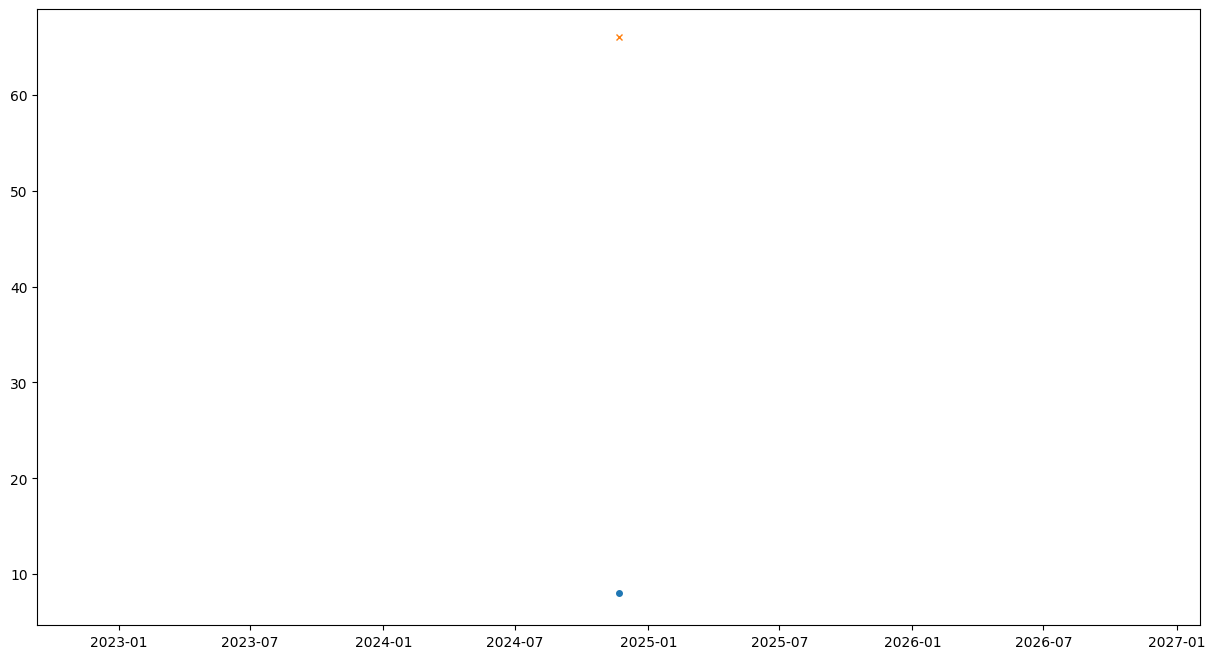

In [19]:
# 11. Pipeline Initialization and Execution

import os
import time
from google.colab import drive
from datetime import datetime

# Define seismic regions
SEISMIC_REGIONS = {
   'pacific_northwest': {
       'name': 'Pacific Northwest',
       'bounds': {'min_lat': 40.0, 'max_lat': 49.0, 'min_lon': -125.0, 'max_lon': -116.0},
       'description': 'Cascadia Subduction Zone region',
       'color': '#1f77b4'
   },
   'california': {
       'name': 'California',
       'bounds': {'min_lat': 32.0, 'max_lat': 42.0, 'min_lon': -124.0, 'max_lon': -114.0},
       'description': 'San Andreas Fault region',
       'color': '#ff7f0e'
   },
   'alaska': {
       'name': 'Alaska',
       'bounds': {'min_lat': 52.0, 'max_lat': 71.0, 'min_lon': -169.0, 'max_lon': -130.0},
       'description': 'Alaska-Aleutian region',
       'color': '#2ca02c'
   },
   'hawaii': {
       'name': 'Hawaii',
       'bounds': {'min_lat': 18.0, 'max_lat': 23.0, 'min_lon': -160.0, 'max_lon': -154.0},
       'description': 'Hawaiian volcanic region',
       'color': '#d62728'
   },
   'central_us': {
       'name': 'Central US',
       'bounds': {'min_lat': 35.0, 'max_lat': 40.0, 'min_lon': -97.0, 'max_lon': -89.0},
       'description': 'New Madrid Seismic Zone',
       'color': '#9467bd'
   }
}

def setup_pipeline_directory(pipeline_type):
   """Setup directory structure for the specified pipeline type."""
   try:
       base_path = f'/content/drive/My Drive/earthquake_data_{pipeline_type}'
       subdirs = ['data', 'models', 'predictions', 'plots', 'evaluations']

       # Create base directories
       for subdir in subdirs:
           dir_path = os.path.join(base_path, subdir)
           os.makedirs(dir_path, exist_ok=True)
           print(f"Created directory: {dir_path}")

       # For regional pipeline, create region-specific subdirectories
       if pipeline_type == 'regional':
           for subdir in subdirs:
               for region in SEISMIC_REGIONS.keys():
                   region_path = os.path.join(base_path, subdir, region)
                   os.makedirs(region_path, exist_ok=True)
                   print(f"Created regional directory: {region_path}")

       print(f"Directory structure created successfully at {base_path}")
       return base_path

   except Exception as e:
       print(f"Error setting up directory structure: {str(e)}")
       return None

def run_monitoring(pipeline, interval):
    """Run continuous monitoring."""
    print(f"\nStarting continuous monitoring with {interval} second intervals.")

    try:
        while True:
            pipeline.run_continuous_monitoring(update_interval=interval)
    except KeyboardInterrupt:
        print("\n👋 Monitoring stopped manually by user.")
    except Exception as e:
        print(f"\n❌ Error during monitoring: {str(e)}")
    finally:
        print("\n✅ Monitoring process completed.")

def run_pipeline():
   """Main function to run earthquake prediction pipeline."""
   try:
       drive.mount('/content/drive')

       while True:  # Main pipeline loop
           # Initial pipeline selection
           print("\nSelect pipeline:")
           print("1: Global Pipeline (Count Prediction)")
           print("2: Regional Pipeline (Regional Count Prediction)")
           print("3: Risk Classification Pipeline")
           selection = input("Enter selection (1/2/3): ").strip()

           if selection == "1":
               pipeline_path = setup_pipeline_directory('global')
               if pipeline_path:
                   pipeline = EarthquakePipeline(drive_path=pipeline_path)
               else:
                   print("Failed to setup pipeline directory")
                   continue
           elif selection == "2":
               print("\nMonitoring the following seismic regions:")
               for region_id, info in SEISMIC_REGIONS.items():
                   print(f"- {info['name']}: {info['description']}")
               pipeline_path = setup_pipeline_directory('regional')
               if pipeline_path:
                   pipeline = RegionalEarthquakePipeline(drive_path=pipeline_path)
               else:
                   print("Failed to setup pipeline directory")
                   continue
           elif selection == "3":
               pipeline_path = setup_pipeline_directory('risk')
               if pipeline_path:
                   pipeline = QuakeRiskPipeline(drive_path=pipeline_path)
                   print("\nInitialized Risk Classification Pipeline")
               else:
                   print("Failed to setup pipeline directory")
                   continue
           else:
               print("Invalid selection")
               continue

           # Mode selection
           print("\nSelect mode:")
           print("1: Training")
           print("2: Monitoring")
           mode = input("Enter mode (1/2): ").strip()

           if mode == "1":
               days = int(input("\nEnter number of days for training (default 31): ") or "31")
               print("\nStarting baseline training...")
               pipeline.run_baseline_training(days_to_process=days)

               # After training completes, offer options
               print("\nTraining completed. Select next action:")
               print("1: Switch to other pipeline")
               print("2: Continue to monitoring")
               print("3: Exit pipeline")
               next_action = input("Enter selection (1/2/3): ").strip()

               if next_action == "1":
                   print("\nSwitching pipelines...")
                   continue  # Goes back to pipeline selection
               elif next_action == "2":
                   interval = int(input("\nEnter update interval in seconds (default 3600): ") or "3600")
                   run_monitoring(pipeline, interval)
               elif next_action == "3":
                   print("\nExiting pipeline")
                   break
               else:
                   print("Invalid selection, exiting pipeline")
                   break

           elif mode == "2":
               interval = int(input("\nEnter update interval in seconds (default 3600): ") or "3600")
               run_monitoring(pipeline, interval)

               # After monitoring completes, offer options
               print("\nMonitoring completed. Select next action:")
               print("1: Switch to other pipeline")
               print("2: Exit pipeline")
               next_action = input("Enter selection (1/2): ").strip()

               if next_action == "1":
                   print("\nSwitching pipelines...")
                   continue  # Goes back to pipeline selection
               elif next_action == "2":
                   print("\nExiting pipeline")
                   break
               else:
                   print("Invalid selection, exiting pipeline")
                   break

           else:
               print("Invalid mode selected")
               break

       print("\nPipeline execution completed")

   except Exception as e:
       print(f"Pipeline execution failed: {str(e)}")
       raise

if __name__ == "__main__":
   run_pipeline()

print("Pipeline initialization code loaded successfully!")



## 12.Hypothesis Testing

Tests if regional models outperform a global model for specific regions

* Null hypothesis (H0): No difference between regional and global prediction errors
* Alternative hypothesis (H1): Regional model has lower prediction errors than global model

1. Prerequisites from Chunk #11:

Run Global Pipeline:
* Training: 31 days
* Monitoring: 15-20 minutes (50-second intervals)

Run Regional Pipeline:
* Training: 31 days
* Monitoring: 15-20 minutes (50-second intervals)

Run Risk Classification Pipeline:
* Training: 31 days
* Monitoring: 15-20 minutes (50-second intervals)

2. Running Hypothesis Test (Chunk #12):
* Execute the test code
 It automatically:
* Loads data from all three pipelines
* Compares prediction errors
* Generates visualizations
* Displays test results for each region

3. Note: All three pipelines must complete their full training and monitoring cycles before running the hypothesis test to ensure valid statistical comparison.

Key Functions:

* Hypothesis Testing for Model Performances
* Data Preparation
* Error Calculation
* Statistical Testing
* Interpretation of Results
* Pipeline Integration

Checklist Items:

* [✓] Statistical Analysis (conducts hypothesis testing to evaluate model performance, comparing regional and global prediction errors)
* [✓] Model Evaluation and Improvement (provides insights into which models (regional or global) are more effective, which will guide future optimization efforts)

In [12]:
# 12. Hypothesis Testing
from scipy import stats
import numpy as np

def perform_hypothesis_test(self, region_id, test_period_days=30):
    """
    Tests if regional models outperform a global model for specific regions.
    H0: No difference between regional and global prediction errors
    H1: Regional model has lower prediction errors than global model
    """
    try:
        # Get date range
        end_date = datetime.now()
        start_date = end_date - timedelta(days=test_period_days)

        # Fetch data
        actual_data = self.fetch_earthquake_data(start_time=start_date, end_time=end_date)
        if actual_data is None or len(actual_data) < self.seq_length:
            print(f"\nRegion: {self.regions[region_id]['name']}")
            print("❌ Insufficient data for hypothesis testing")
            return None

        # Process regional data
        regional_data = self.process_regional_data(actual_data)
        if region_id not in regional_data or len(regional_data[region_id]) < self.seq_length:
            print(f"\nRegion: {self.regions[region_id]['name']}")
            print("❌ Insufficient regional data for analysis")
            return None

        # Calculate daily counts
        region_df = regional_data[region_id]
        regional_counts = region_df.groupby(pd.to_datetime(region_df['time']).dt.date).size()
        global_counts = actual_data.groupby(pd.to_datetime(actual_data['time']).dt.date).size()

        if len(regional_counts) < self.seq_length + 1:
            print(f"\nRegion: {self.regions[region_id]['name']}")
            print(f"❌ Insufficient daily data points (need >{self.seq_length}, got {len(regional_counts)})")
            return None

        print(f"\nRegion: {self.regions[region_id]['name']}")
        print(f"Analysis Period: {start_date.date()} to {end_date.date()}")
        print(f"Total Daily Data Points: {len(regional_counts)}")

        # Initialize results structure
        results = {
            'region': self.regions[region_id]['name'],
            'period': {
                'start': start_date.date(),
                'end': end_date.date(),
                'days': test_period_days
            },
            'data_points': len(regional_counts),
            'descriptive_stats': {},
            'hypothesis_tests': {},
            'prediction_metrics': {}
        }

        # Calculate predictions and errors
        regional_errors = []
        global_errors = []
        regional_predictions = []
        actual_values = []

        for i in range(len(regional_counts) - self.seq_length):
            # Regional prediction
            reg_sequence = regional_counts.iloc[i:i+self.seq_length].values
            reg_sequence_tensor = torch.FloatTensor(reg_sequence).unsqueeze(-1)

            with torch.no_grad():
                reg_pred = self.regional_models[region_id](reg_sequence_tensor)
                reg_pred = reg_pred.flatten()[-1].item()
                actual = regional_counts.iloc[i+self.seq_length]
                regional_errors.append(abs(reg_pred - actual))
                regional_predictions.append(reg_pred)
                actual_values.append(actual)

            # Global prediction
            global_pred = global_counts.iloc[i+self.seq_length-1]
            actual_global = global_counts.iloc[i+self.seq_length]
            global_errors.append(abs(global_pred - actual_global))

        # Convert to numpy arrays
        regional_errors = np.array(regional_errors)
        global_errors = np.array(global_errors)
        regional_predictions = np.array(regional_predictions)
        actual_values = np.array(actual_values)

        # 1. Descriptive Statistics
        results['descriptive_stats'] = {
            'regional_predictions': {
                'mean': float(np.mean(regional_predictions)),
                'std': float(np.std(regional_predictions)),
                'median': float(np.median(regional_predictions)),
                'min': float(np.min(regional_predictions)),
                'max': float(np.max(regional_predictions))
            },
            'actual_values': {
                'mean': float(np.mean(actual_values)),
                'std': float(np.std(actual_values)),
                'median': float(np.median(actual_values)),
                'min': float(np.min(actual_values)),
                'max': float(np.max(actual_values))
            },
            'prediction_errors': {
                'regional': {
                    'mean': float(np.mean(regional_errors)),
                    'std': float(np.std(regional_errors))
                },
                'global': {
                    'mean': float(np.mean(global_errors)),
                    'std': float(np.std(global_errors))
                }
            }
        }

        # 2. Hypothesis Tests
        # a. Paired t-test between regional and global errors
        t_stat, p_value = stats.ttest_rel(global_errors, regional_errors)
        results['hypothesis_tests']['paired_ttest'] = {
            'statistic': float(t_stat),
            'p_value': float(p_value),
            'test_type': 'Paired t-test (Global vs Regional errors)',
            'significant': bool(p_value < 0.05)
        }

        # b. One-sample z-test for regional error distribution
        z_stat = stats.zscore(regional_errors)
        z_p_value = float(stats.norm.sf(abs(z_stat.mean()))*2)
        results['hypothesis_tests']['z_test'] = {
            'statistic': float(np.mean(z_stat)),
            'p_value': z_p_value,
            'test_type': 'One-sample z-test (Regional errors)',
            'significant': bool(z_p_value < 0.05)
        }

        # c. ANOVA between different time periods
        period_size = len(regional_errors) // 3
        if period_size >= 2:  # Only perform ANOVA if we have enough data points
            period1 = regional_errors[:period_size]
            period2 = regional_errors[period_size:2*period_size]
            period3 = regional_errors[2*period_size:3*period_size]
            f_stat, anova_p = stats.f_oneway(period1, period2, period3)
            results['hypothesis_tests']['anova'] = {
                'statistic': float(f_stat),
                'p_value': float(anova_p),
                'test_type': 'One-way ANOVA (Time periods)',
                'significant': bool(anova_p < 0.05)
            }

        # 3. Prediction Metrics
        results['prediction_metrics'] = {
            'mse': float(np.mean((regional_predictions - actual_values) ** 2)),
            'mae': float(np.mean(np.abs(regional_predictions - actual_values))),
            'rmse': float(np.sqrt(np.mean((regional_predictions - actual_values) ** 2))),
            'correlation': float(np.corrcoef(regional_predictions, actual_values)[0, 1])
        }

        # Print summary statistics
        print("\nSummary Statistics:")
        print("-" * 40)
        print("Regional Model:")
        print(f"Mean Error: {np.mean(regional_errors):.2f} ± {np.std(regional_errors):.2f}")
        print(f"Median Error: {np.median(regional_errors):.2f}")
        print("\nGlobal Model:")
        print(f"Mean Error: {np.mean(global_errors):.2f} ± {np.std(global_errors):.2f}")
        print(f"Median Error: {np.median(global_errors):.2f}")

        # Print hypothesis test results
        print("\nHypothesis Tests:")
        print("-" * 40)
        for test_name, test_results in results['hypothesis_tests'].items():
            print(f"\n{test_results['test_type']}:")
            print(f"Statistic: {test_results['statistic']:.4f}")
            print(f"P-value: {test_results['p_value']:.4f}")
            print(f"Significant: {'Yes' if test_results['significant'] else 'No'}")

        # Print conclusion
        print("\nConclusion:")
        print("-" * 40)
        if p_value < 0.05:
            if np.mean(regional_errors) < np.mean(global_errors):
                print("✅ Regional model significantly outperforms global model")
            else:
                print("❌ Global model significantly outperforms regional model")
        else:
            print("⚠️ No significant difference between models")

        return results

    except Exception as e:
        print(f"\nRegion: {self.regions[region_id]['name']}")
        print(f"❌ Error in hypothesis testing: {str(e)}")
        import traceback
        print(traceback.format_exc())
        return None

# Add method to pipeline class
RegionalEarthquakePipeline.perform_hypothesis_test = perform_hypothesis_test

# Execute tests
print("\nStarting Hypothesis Tests\n")
pipeline = RegionalEarthquakePipeline(drive_path='/content/drive/My Drive/earthquake_data')

# Test each region directly
all_results = {}
for region_id in SEISMIC_REGIONS.keys():
    print(f"\nAnalyzing {SEISMIC_REGIONS[region_id]['name']}...")
    results = pipeline.perform_hypothesis_test(region_id)
    if results is not None:
        all_results[region_id] = results

print("\nHypothesis testing complete!")


Starting Hypothesis Tests


Analyzing Pacific Northwest...
Fetching data from 2024-10-31 to 2024-12-01

Data Collection Summary:
------------------------------
Total earthquakes collected: 1233
Date range: 2024-10-31 00:23:07.825000 to 2024-11-30 13:26:51.260000
Magnitude range: 2.5 to 6.8
------------------------------

Regional Data Summary for 2024-11-30:
- Pacific Northwest: 13 earthquakes
- California: 53 earthquakes
- Alaska: 107 earthquakes
- Hawaii: 48 earthquakes
- Central US: 4 earthquakes

Region: Pacific Northwest
Analysis Period: 2024-10-31 to 2024-11-30
Total Daily Data Points: 12

Summary Statistics:
----------------------------------------
Regional Model:
Mean Error: 0.67 ± 0.05
Median Error: 0.68

Global Model:
Mean Error: 10.40 ± 6.62
Median Error: 13.00

Hypothesis Tests:
----------------------------------------

Paired t-test (Global vs Regional errors):
Statistic: 2.9218
P-value: 0.0432
Significant: Yes

One-sample z-test (Regional errors):
Statistic: -0.0000
P-va

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Data Collection Summary:
------------------------------
Total earthquakes collected: 1233
Date range: 2024-10-31 00:23:07.825000 to 2024-11-30 13:26:51.260000
Magnitude range: 2.5 to 6.8
------------------------------

Regional Data Summary for 2024-11-30:
- Pacific Northwest: 13 earthquakes
- California: 53 earthquakes
- Alaska: 107 earthquakes
- Hawaii: 48 earthquakes
- Central US: 4 earthquakes

Region: Alaska
Analysis Period: 2024-10-31 to 2024-11-30
Total Daily Data Points: 31

Summary Statistics:
----------------------------------------
Regional Model:
Mean Error: 3.06 ± 2.20
Median Error: 2.79

Global Model:
Mean Error: 8.46 ± 6.11
Median Error: 7.00

Hypothesis Tests:
----------------------------------------

Paired t-test (Global vs Regional errors):
Statistic: 3.9148
P-value: 0.0007
Significant: Yes

One-sample z-test (Regional errors):
Statistic: 0.0000
P-value: 1.0000
Significant: No

One-way ANOVA (Time periods):
Statistic: 1.3027
P-value: 0.2929
Significant: No

Conclusi

### 12.a Hypothesis Testing Visualizations

Key Functions:

* Visual Model Performance
* Displays Statistical Significance
* Dynamic Key Findings
* Improved Usability (function accepts test results as input - integrating with hypothesis test in previous chunk)


Checklist Items:

* [✓] Visualization
* [✓] Model Evaluation and Improvement (provides insights into which models and regions demonstrate the best performance)
* [✓] Statistical Analysis (summarizes hypothesis testing results dynamically and provides intuitive visual and textual feedback)


Starting Complete Statistical Analysis

Added missing metadata field: creation_date
Added missing metadata field: data_dates
Added missing metadata field: model_versions
Added missing metadata field: predictions
Added missing metadata field: evaluations
Added missing metadata field: pipeline_config

Analyzing Pacific Northwest...
Fetching data from 2024-10-31 to 2024-12-01

Data Collection Summary:
------------------------------
Total earthquakes collected: 1233
Date range: 2024-10-31 00:23:07.825000 to 2024-11-30 13:26:51.260000
Magnitude range: 2.5 to 6.8
------------------------------

Regional Data Summary for 2024-11-30:
- Pacific Northwest: 13 earthquakes
- California: 53 earthquakes
- Alaska: 107 earthquakes
- Hawaii: 48 earthquakes
- Central US: 4 earthquakes

Region: Pacific Northwest
Analysis Period: 2024-10-31 to 2024-11-30
Total Daily Data Points: 12

Summary Statistics:
----------------------------------------
Regional Model:
Mean Error: 1.35 ± 0.03
Median Error: 1.34

Gl

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Data Collection Summary:
------------------------------
Total earthquakes collected: 1233
Date range: 2024-10-31 00:23:07.825000 to 2024-11-30 13:26:51.260000
Magnitude range: 2.5 to 6.8
------------------------------

Regional Data Summary for 2024-11-30:
- Pacific Northwest: 13 earthquakes
- California: 53 earthquakes
- Alaska: 107 earthquakes
- Hawaii: 48 earthquakes
- Central US: 4 earthquakes

Region: California
Analysis Period: 2024-10-31 to 2024-11-30
Total Daily Data Points: 23

Summary Statistics:
----------------------------------------
Regional Model:
Mean Error: 2.92 ± 1.23
Median Error: 3.32

Global Model:
Mean Error: 8.00 ± 6.05
Median Error: 6.00

Hypothesis Tests:
----------------------------------------

Paired t-test (Global vs Regional errors):
Statistic: 3.0937
P-value: 0.0074
Significant: Yes

One-sample z-test (Regional errors):
Statistic: 0.0000
P-value: 1.0000
Significant: No

One-way ANOVA (Time periods):
Statistic: 1.1149
P-value: 0.3596
Significant: No

Conc

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


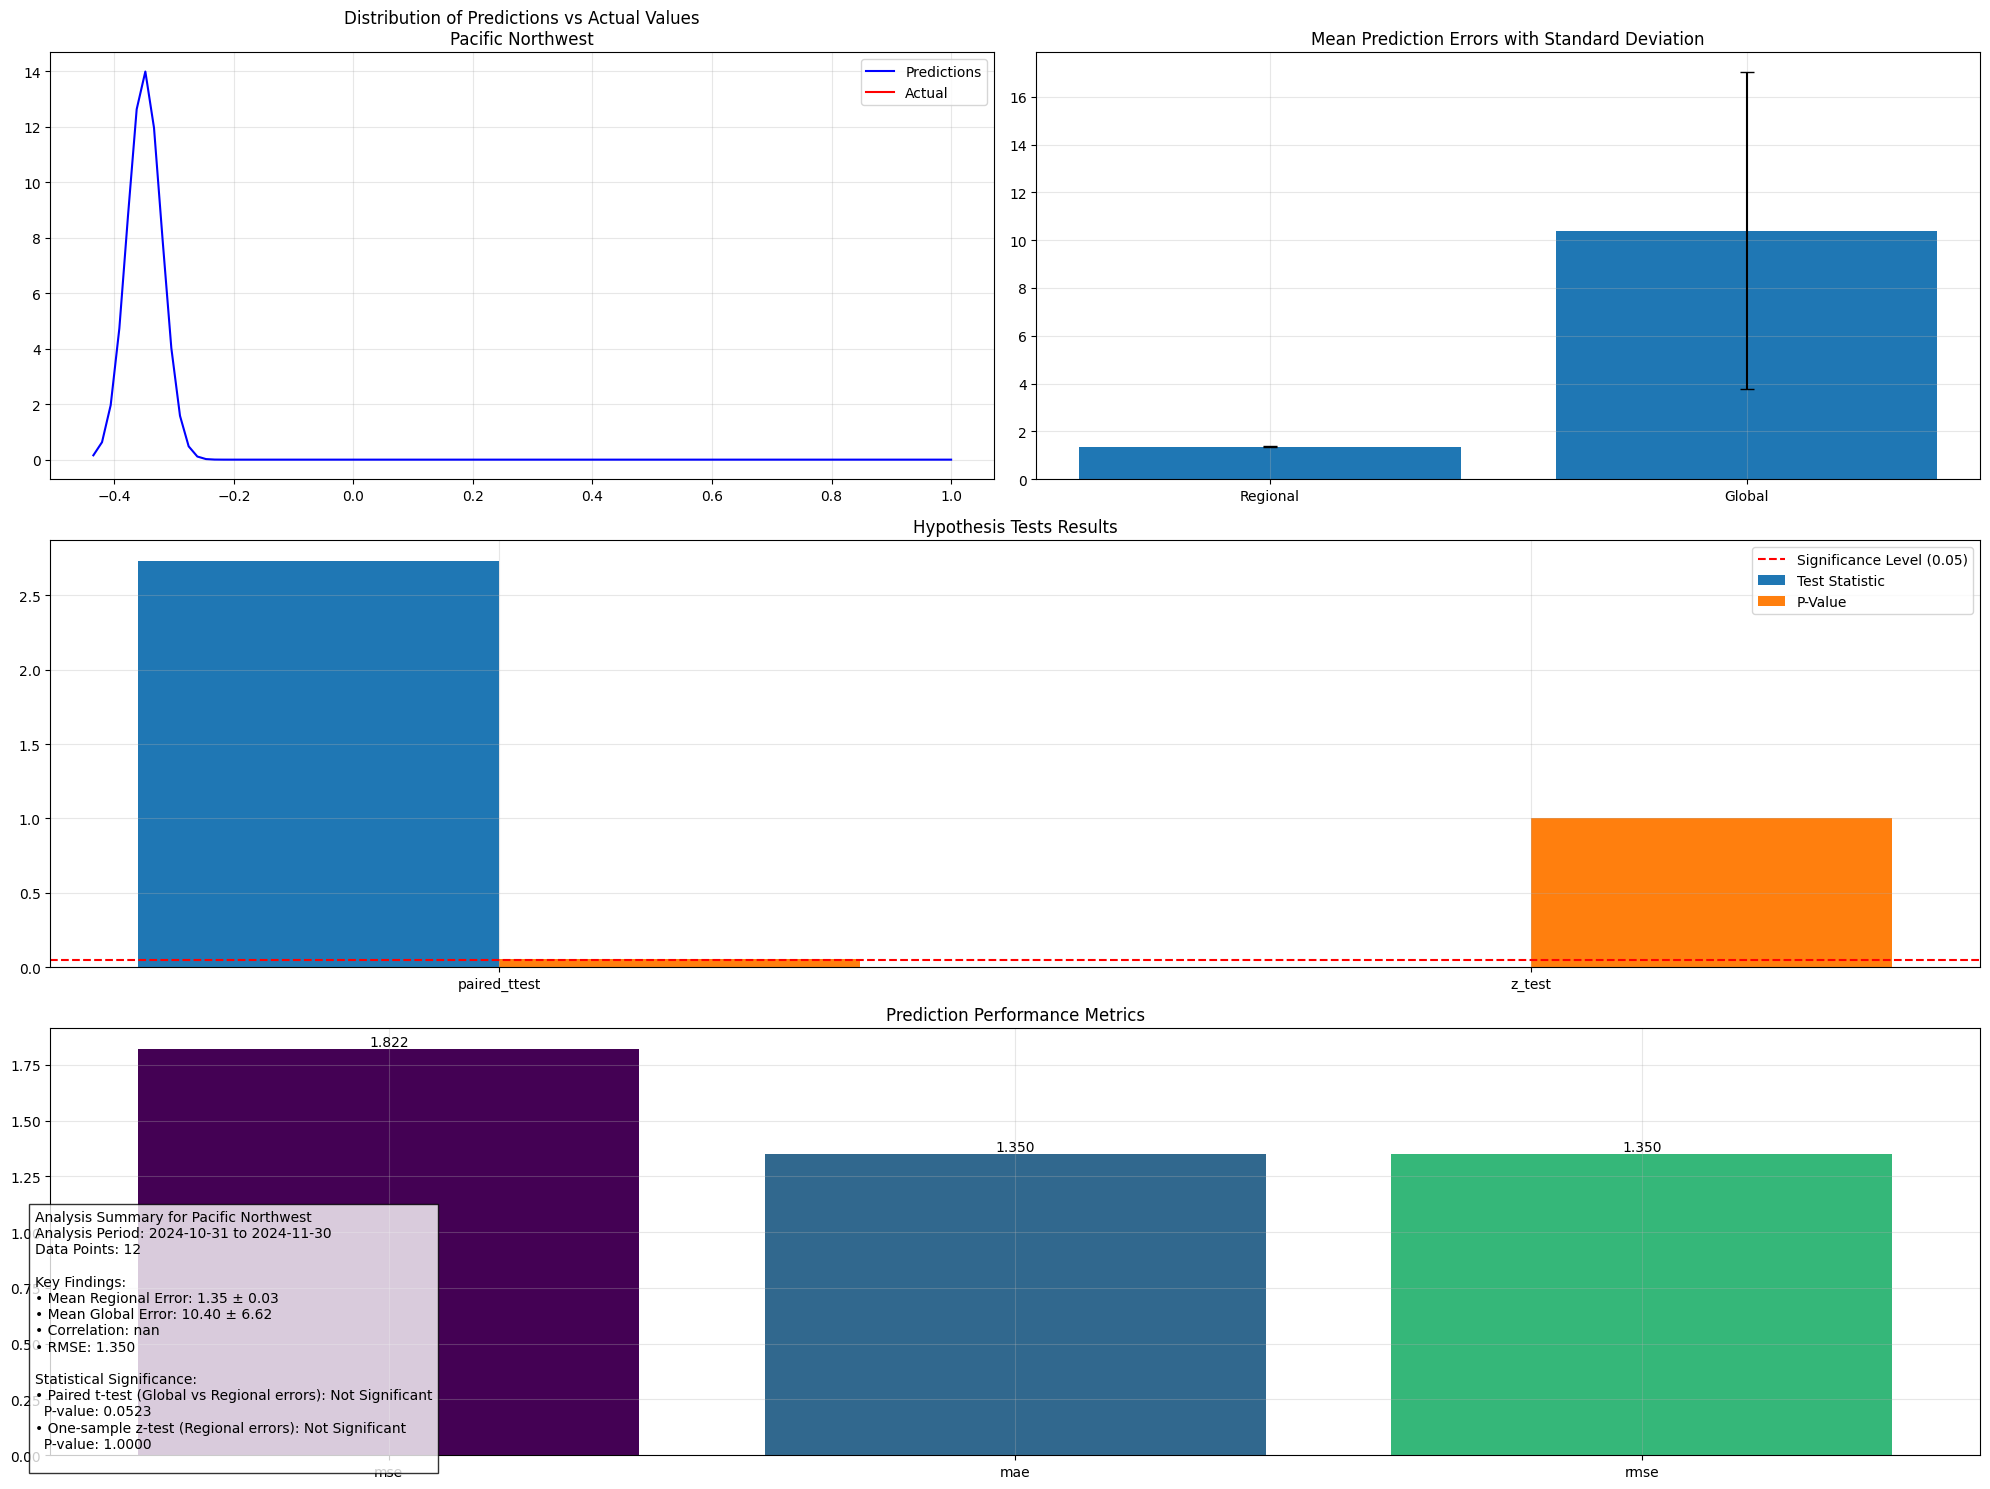


✅ Visualization complete for Pacific Northwest
--------------------------------------------------


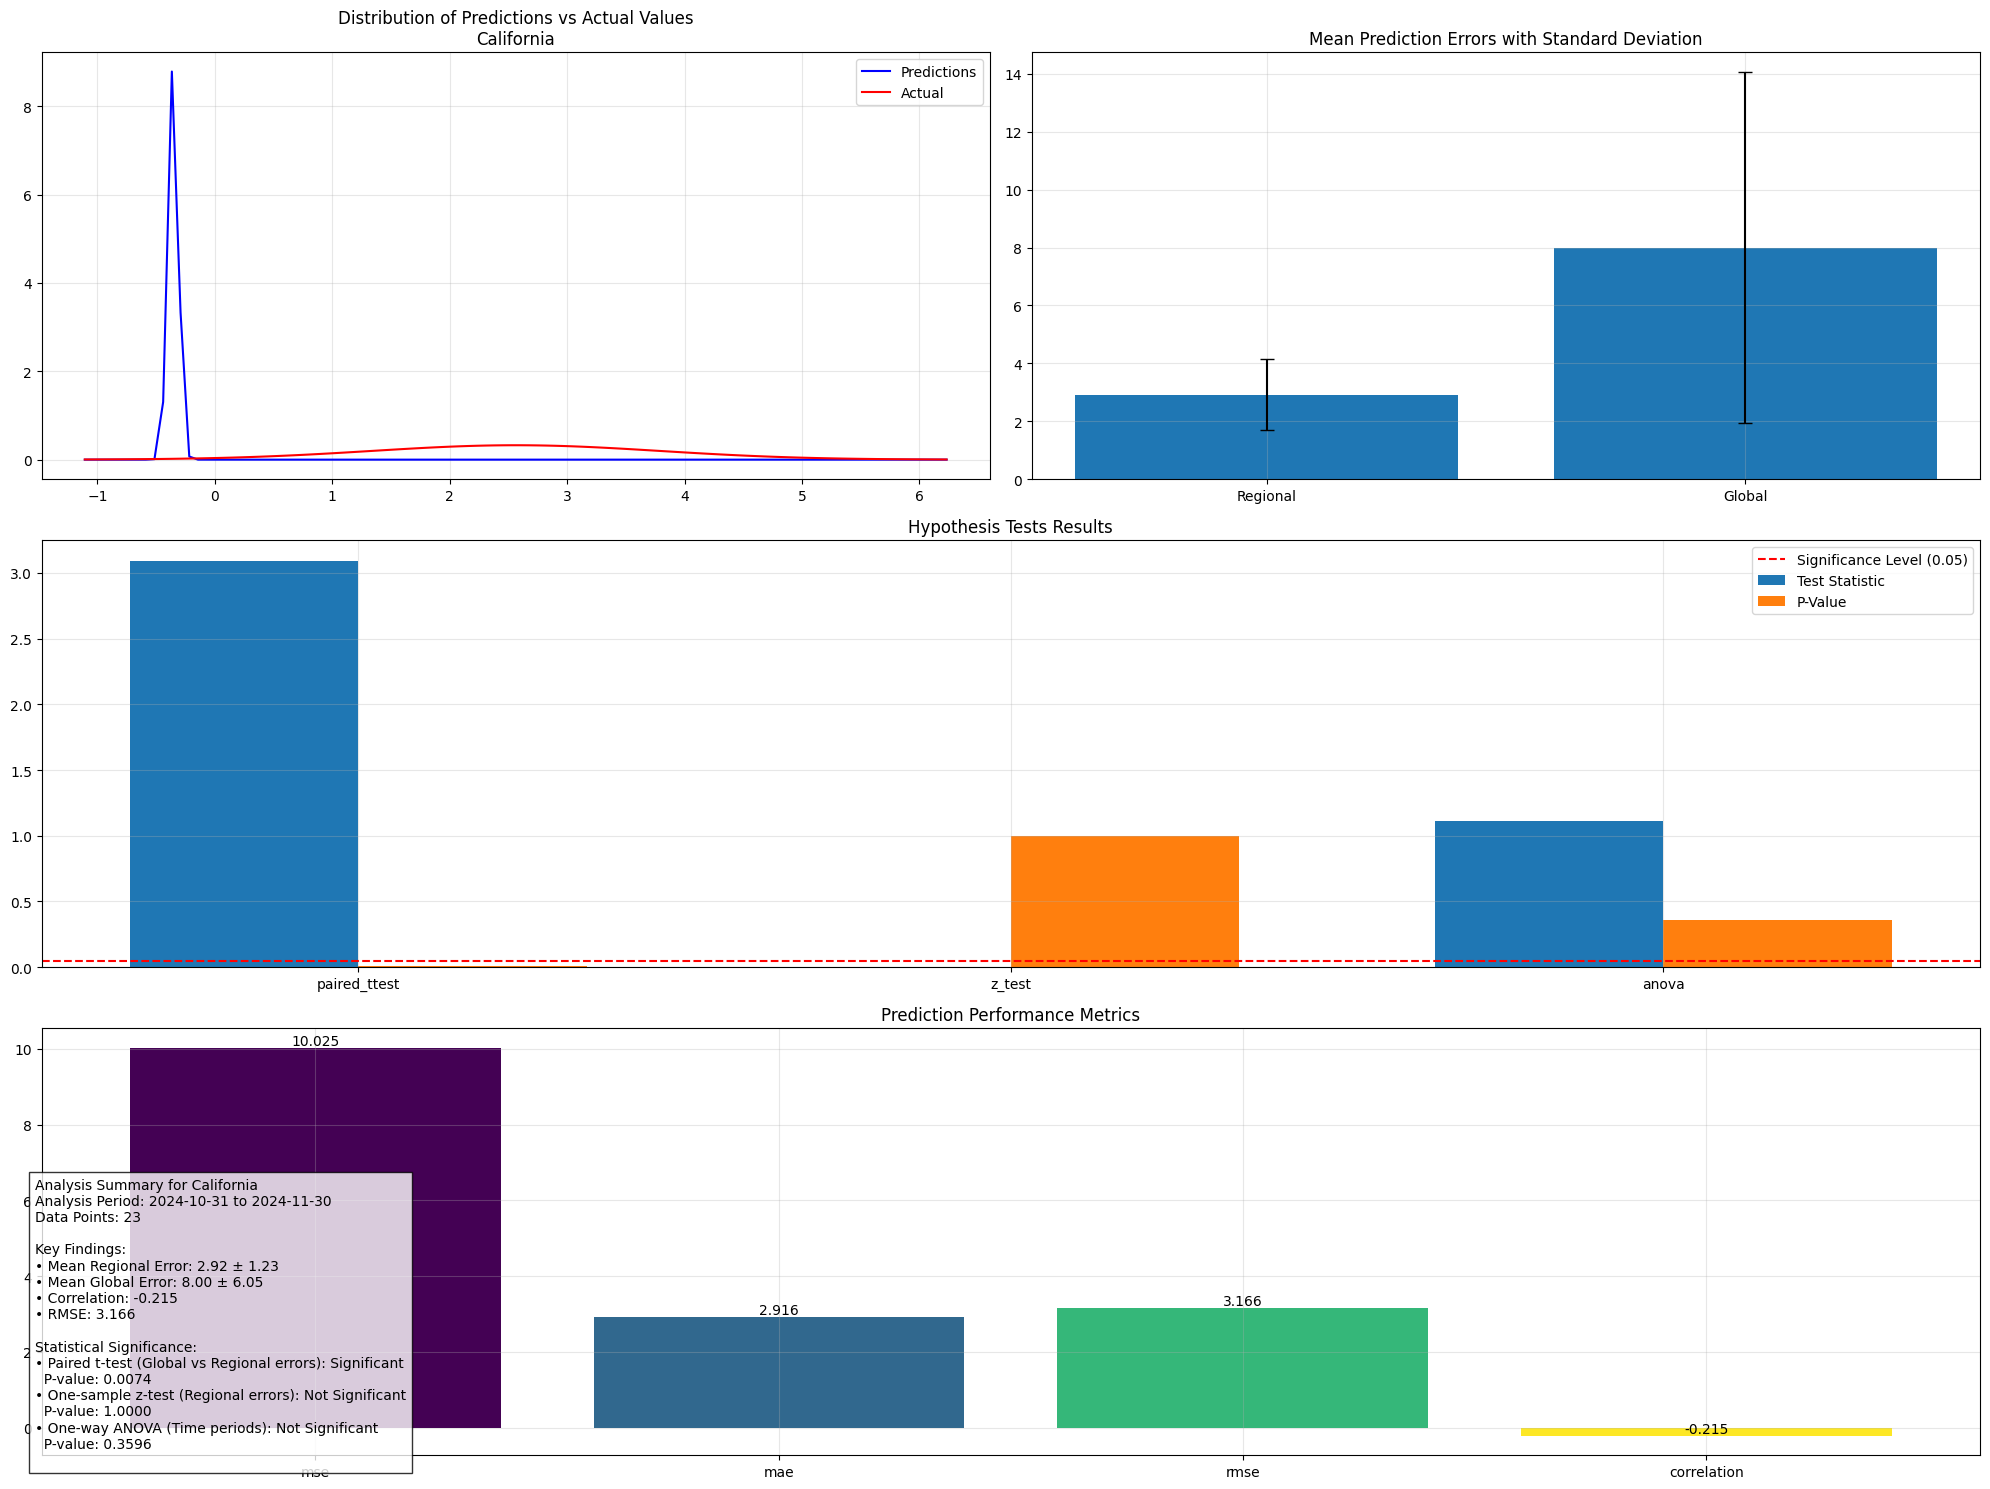


✅ Visualization complete for California
--------------------------------------------------


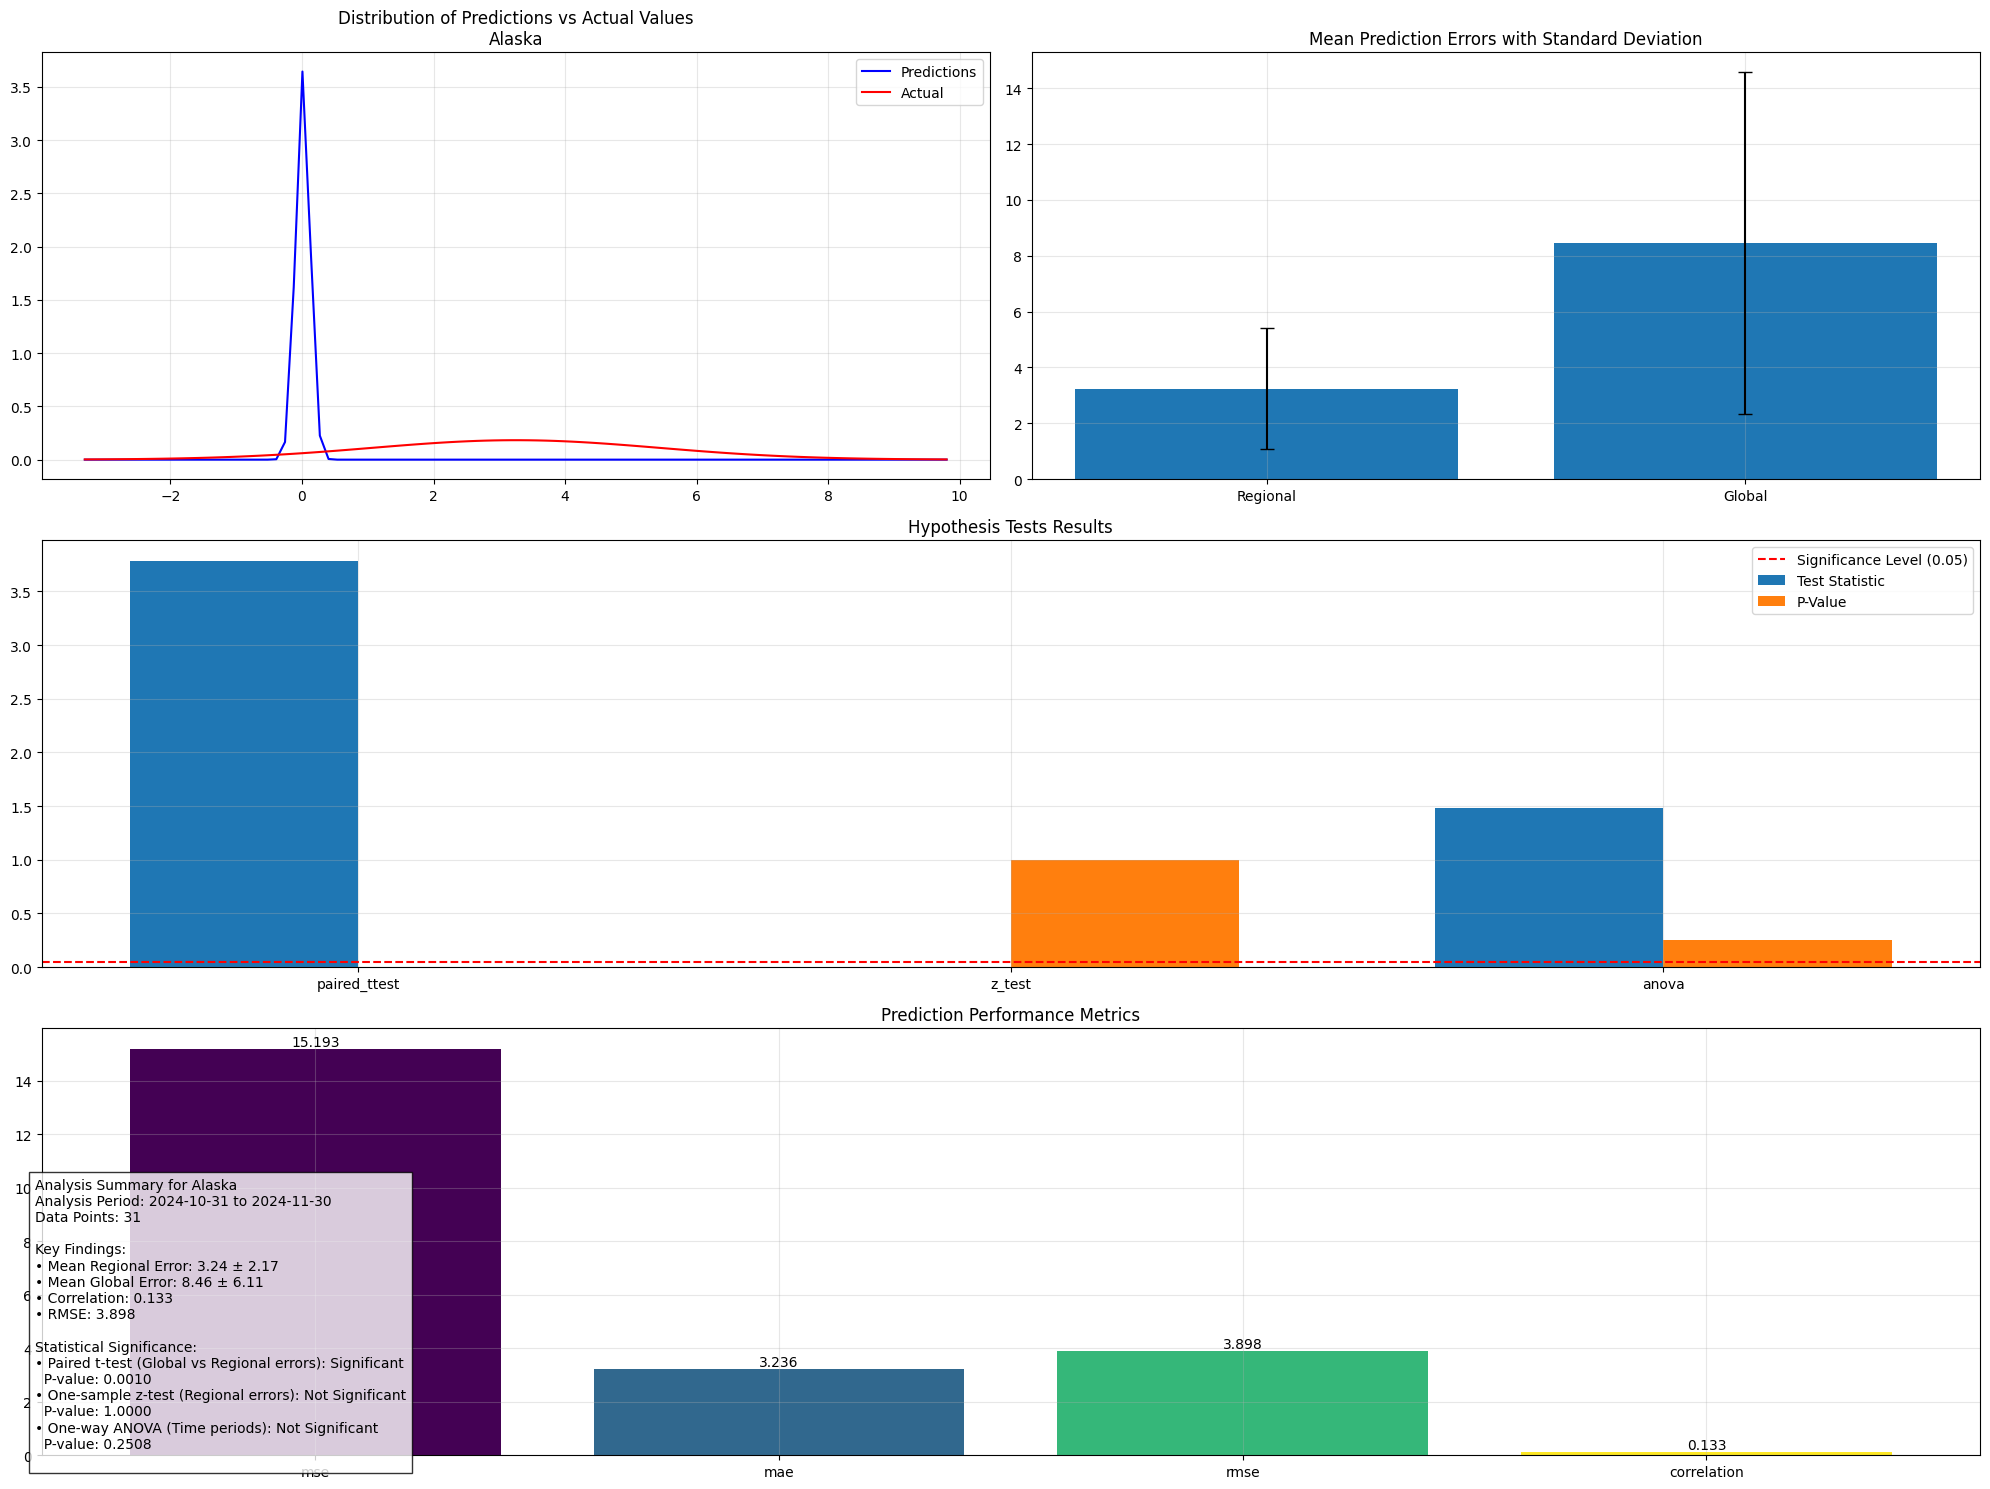


✅ Visualization complete for Alaska
--------------------------------------------------


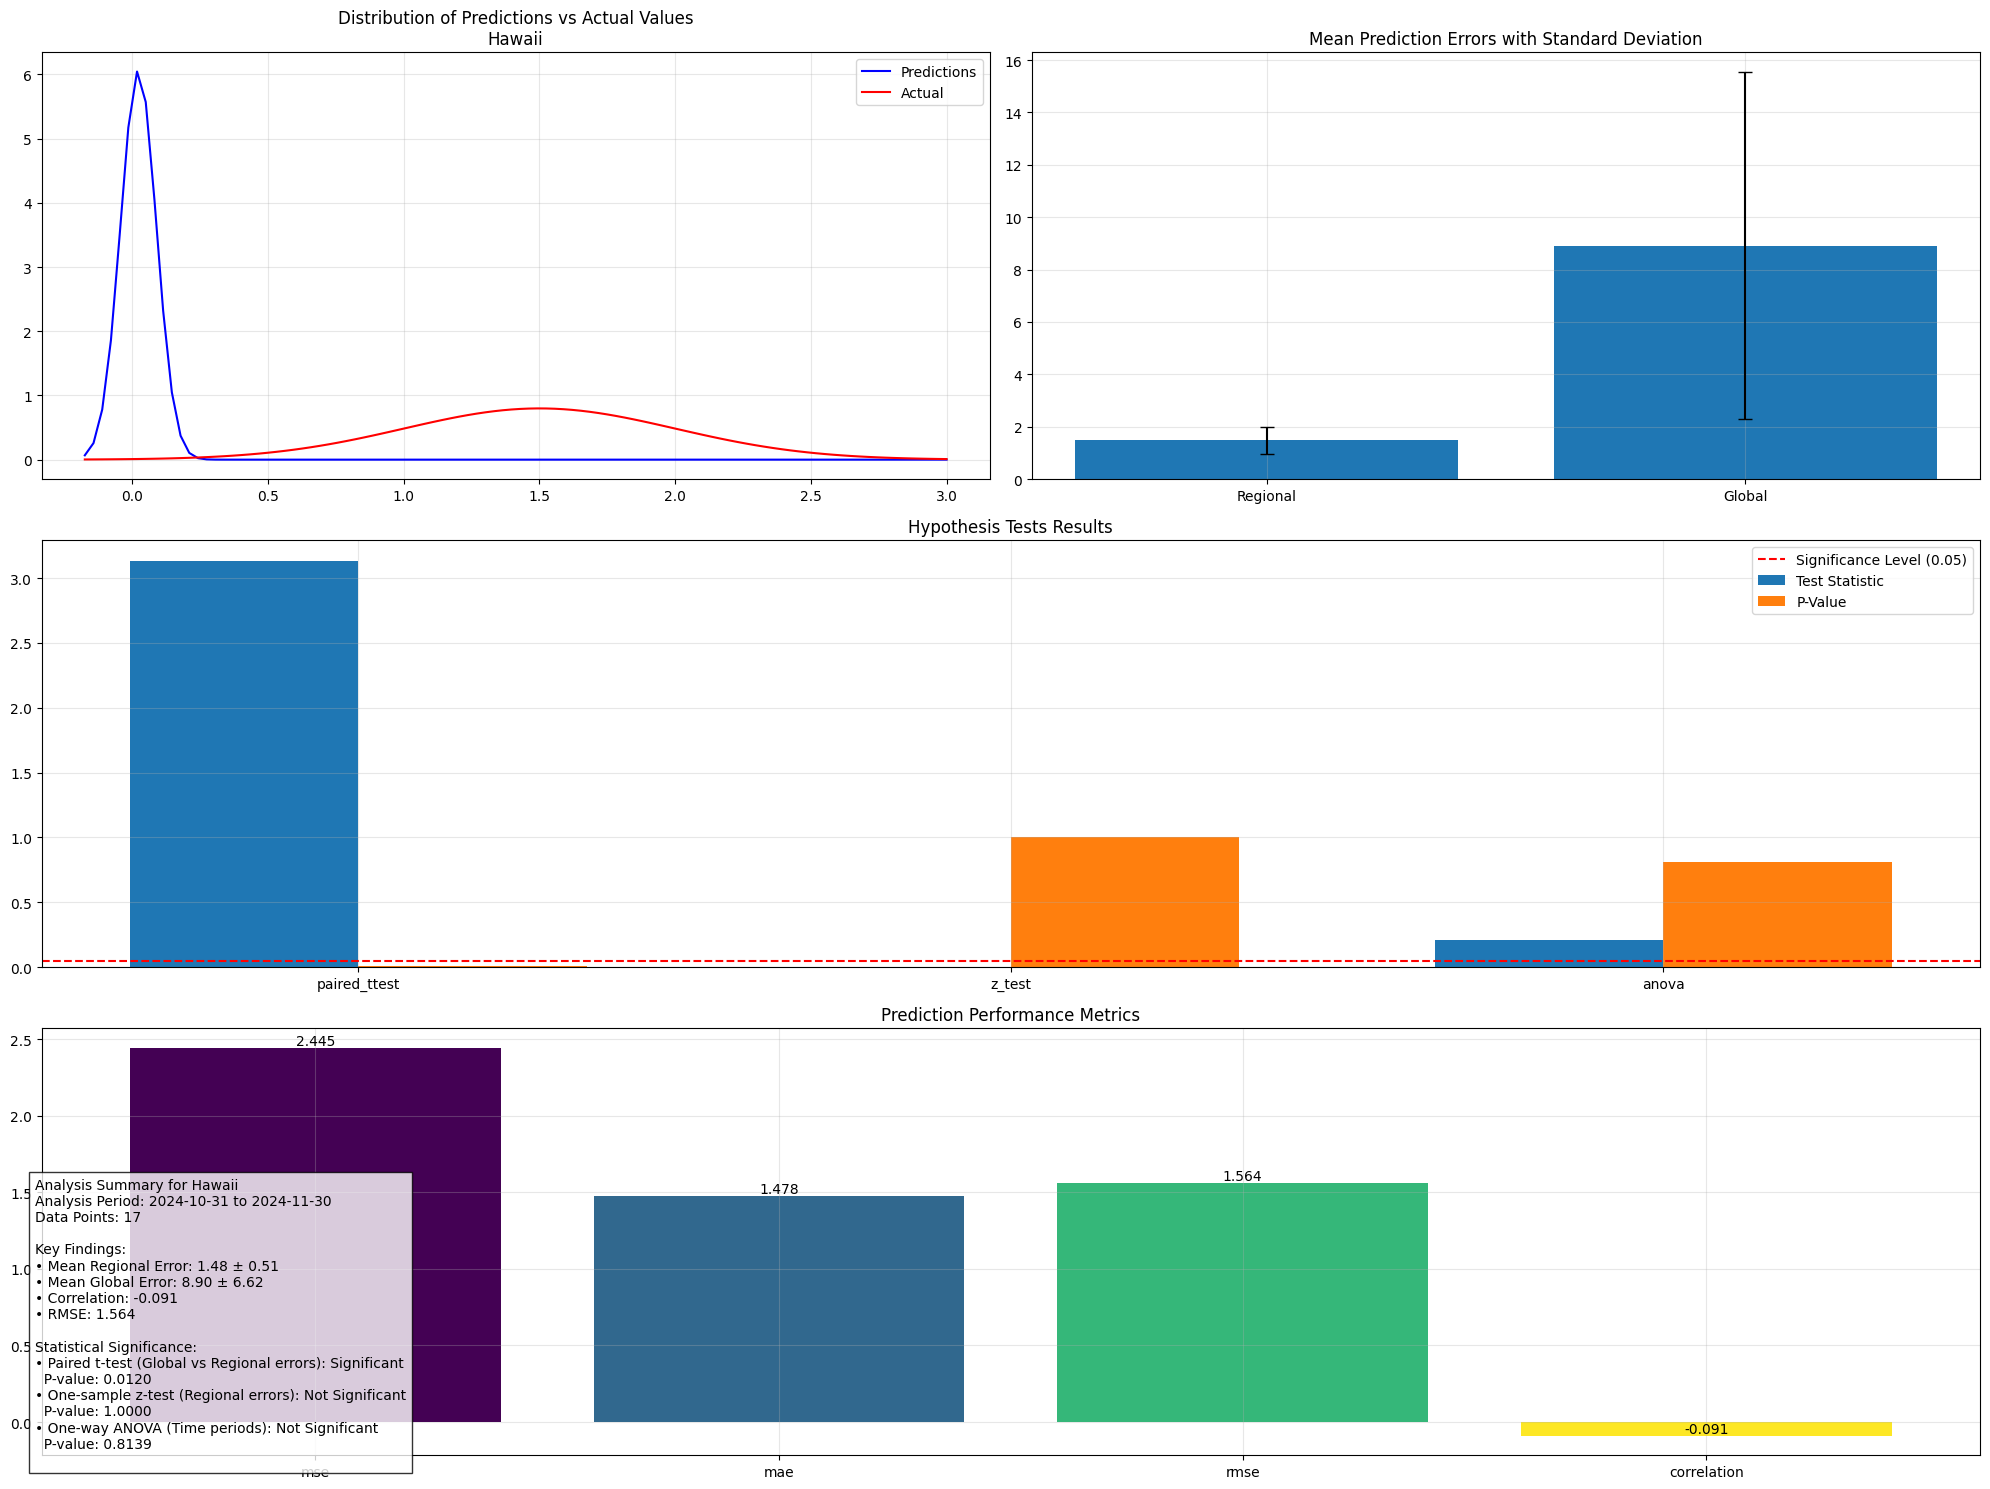


✅ Visualization complete for Hawaii
--------------------------------------------------

Analysis complete!


In [13]:
# 12a. Hypothesis Testing Visualizations

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown



def visualize_hypothesis_results(test_results):
    """
    Creates comprehensive visualizations of statistical analysis results.
    """
    if not test_results:
        print("No test results to visualize")
        return

    print("\n📊 Generating Statistical Analysis Visualizations")
    print("=" * 50)

    for region_id, results in test_results.items():
        try:
            if results is None:
                print(f"Skipping visualization for {region_id}: No results available")
                continue

            # Verify data structure
            required_keys = ['descriptive_stats', 'hypothesis_tests', 'prediction_metrics', 'region', 'period']
            if not all(key in results for key in required_keys):
                print(f"Skipping visualization for {region_id}: Invalid data structure")
                continue

            # Create figure with multiple subplots
            fig = plt.figure(figsize=(20, 15))
            gs = fig.add_gridspec(3, 2)

            try:
                # 1. Prediction Distribution Plot
                ax1 = fig.add_subplot(gs[0, 0])
                pred_stats = results['descriptive_stats']['regional_predictions']
                actual_stats = results['descriptive_stats']['actual_values']

                pred_mean = float(pred_stats['mean'])
                pred_std = float(pred_stats['std'])
                actual_mean = float(actual_stats['mean'])
                actual_std = float(actual_stats['std'])

                x = np.linspace(
                    min(pred_mean - 3*pred_std, actual_mean - 3*actual_std),
                    max(pred_mean + 3*pred_std, actual_mean + 3*actual_std),
                    100
                )

                ax1.plot(x, stats.norm.pdf(x, pred_mean, pred_std), 'b-', label='Predictions')
                ax1.plot(x, stats.norm.pdf(x, actual_mean, actual_std), 'r-', label='Actual')
                ax1.set_title(f'Distribution of Predictions vs Actual Values\n{results["region"]}')
                ax1.legend()
                ax1.grid(True, alpha=0.3)

                # 2. Error Analysis Plot
                ax2 = fig.add_subplot(gs[0, 1])
                error_stats = results['descriptive_stats']['prediction_errors']
                reg_error_mean = float(error_stats['regional']['mean'])
                reg_error_std = float(error_stats['regional']['std'])
                glob_error_mean = float(error_stats['global']['mean'])
                glob_error_std = float(error_stats['global']['std'])

                ax2.bar(['Regional', 'Global'], [reg_error_mean, glob_error_mean],
                        yerr=[reg_error_std, glob_error_std], capsize=5)
                ax2.set_title('Mean Prediction Errors with Standard Deviation')
                ax2.grid(True, alpha=0.3)

                # 3. Statistical Tests Results
                ax3 = fig.add_subplot(gs[1, :])
                tests = results['hypothesis_tests']
                test_names = list(tests.keys())
                p_values = [float(tests[test]['p_value']) for test in test_names]
                statistics = [float(tests[test]['statistic']) for test in test_names]

                x = np.arange(len(test_names))
                width = 0.35

                ax3.bar(x - width/2, statistics, width, label='Test Statistic')
                ax3.bar(x + width/2, p_values, width, label='P-Value')
                ax3.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
                ax3.set_xticks(x)
                ax3.set_xticklabels(test_names)
                ax3.set_title('Hypothesis Tests Results')
                ax3.legend()
                ax3.grid(True, alpha=0.3)

                # 4. Prediction Metrics
                ax4 = fig.add_subplot(gs[2, :])
                metrics = results['prediction_metrics']
                metric_names = list(metrics.keys())
                metric_values = [float(v) for v in metrics.values()]

                colors = plt.cm.viridis(np.linspace(0, 1, len(metric_names)))
                bars = ax4.bar(metric_names, metric_values, color=colors)
                ax4.set_title('Prediction Performance Metrics')
                ax4.grid(True, alpha=0.3)

                # Add value labels on top of bars
                for bar in bars:
                    height = bar.get_height()
                    ax4.text(bar.get_x() + bar.get_width()/2., height,
                            f'{height:.3f}',
                            ha='center', va='bottom')

                # Add text summary
                text_summary = (
                    f"Analysis Summary for {results['region']}\n"
                    f"Analysis Period: {results['period']['start']} to {results['period']['end']}\n"
                    f"Data Points: {results['data_points']}\n\n"
                    f"Key Findings:\n"
                    f"• Mean Regional Error: {reg_error_mean:.2f} ± {reg_error_std:.2f}\n"
                    f"• Mean Global Error: {glob_error_mean:.2f} ± {glob_error_std:.2f}\n"
                    f"• Correlation: {results['prediction_metrics']['correlation']:.3f}\n"
                    f"• RMSE: {results['prediction_metrics']['rmse']:.3f}\n\n"
                    f"Statistical Significance:\n"
                )

                # Add test results to summary
                for test_name, test_data in tests.items():
                    text_summary += f"• {test_data['test_type']}: {'Significant' if test_data['significant'] else 'Not Significant'}\n"
                    text_summary += f"  P-value: {test_data['p_value']:.4f}\n"

                plt.figtext(0.02, 0.02, text_summary, fontsize=10,
                            bbox=dict(facecolor='white', alpha=0.8))

                plt.tight_layout()
                plt.show()
                plt.close()

                print(f"\n✅ Visualization complete for {results['region']}")
                print("-" * 50)

            except Exception as e:
                plt.close()  # Clean up the figure if there's an error
                print(f"Error creating visualization for {region_id}: {str(e)}")
                continue

        except Exception as e:
            print(f"Error processing results for {region_id}: {str(e)}")
            continue

# Now run the complete analysis with visualizations
print("\nStarting Complete Statistical Analysis\n")

# Initialize pipeline and run tests
pipeline = RegionalEarthquakePipeline(drive_path='/content/drive/My Drive/earthquake_data')
all_results = {}

# Test each region
for region_id in SEISMIC_REGIONS.keys():
    print(f"\nAnalyzing {SEISMIC_REGIONS[region_id]['name']}...")
    results = pipeline.perform_hypothesis_test(region_id)
    if results is not None:
        all_results[region_id] = results

# Generate visualizations
if all_results:
    print("\nGenerating visualizations for all regions...")
    visualize_hypothesis_results(all_results)
    print("\nAnalysis complete!")
else:
    print("\n❌ No results available for visualization")



## 13.Interactive Dashboard with Real-Time Updates and Data Persistence
Key Functions:

* Real-Time Predictions (automatically updates every 1 minute with pipeline data)
* PCA Component Visualization (interactive component selection)
* Interactive User Controls (dropdowns, interval updates)

Checklist Items:

* [✓] Real-Time Data Integration (connects directly to earthquake pipeline)
* [✓] Data Processing and Analysis (implements PCA visualization and model metrics)
* [✓] Visualization (multiple interactive plots and maps)
* [✓] Optimization and Feedback Loop (continuous updates from pipeline)
* [✓] User Interaction (dropdown menus, region selection, metric choice)


In [16]:
# Chunk 13: Interactive Dashboard with Real-Time Updates and Data Persistence

# Section 1: Core Imports and Dependencies
# !pip install dash # uncomment if import error
# !pip install dash-bootstrap-components # uncomment if import error

import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dash.exceptions import PreventUpdate
import traceback

# Section 2: Style Definitions
REGIONAL_CARD_STYLE = {
    'backgroundColor': 'white',
    'padding': '15px',
    'borderRadius': '10px',
    'marginBottom': '10px',
    'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
}

# Section 3: Pipeline and Data Management
def initialize_pipelines():
    """Initialize all three pipelines"""
    global_pipeline = EarthquakePipeline(drive_path='earthquake_data_global')
    regional_pipeline = RegionalEarthquakePipeline(drive_path='earthquake_data_regional')
    return global_pipeline, regional_pipeline

def create_dashboard_data(global_pipeline, regional_pipeline):
    """Creates and structures data for dashboard consumption"""
    current_time = datetime.now()
    start_time = current_time - timedelta(days=14)

    try:
        data = global_pipeline.fetch_earthquake_data(
            start_time=start_time,
            end_time=current_time
        )

        if data is not None:
            regional_data = regional_pipeline.process_regional_data(data)
            pca_results = perform_dimensionality_reduction(data)
            return {
                'global_data': data.to_json(orient='split', date_format='iso'),
                'regional_data': {
                    region: df.to_json(orient='split', date_format='iso')
                    for region, df in regional_data.items()
                },
                'pca_data': pca_results.tolist() if pca_results is not None else None,
                'timestamp': current_time.strftime('%Y-%m-%d %H:%M:%S')
            }

    except Exception as e:
        print(f"Error creating dashboard data: {str(e)}")
        traceback.print_exc()
    return None

# Section 4: PCA Analysis Components
def create_pca_plot(pca_data, global_data, components):
    """Creates the PCA visualization"""
    return px.scatter(
        x=pca_data[:, components[0]],
        y=pca_data[:, components[1]],
        color=global_data['magnitude'],
        title='PCA Components Analysis',
        labels={
            'x': f'Component {components[0] + 1}',
            'y': f'Component {components[1] + 1}',
            'color': 'Magnitude'
        }
    )

# Section 5: Dashboard Application
def create_dashboard_app(global_pipeline, regional_pipeline):
    """Creates and configures the dashboard application"""
    app = dash.Dash(__name__)

    # Define layout
    app.layout = html.Div([
        # Header
        html.Div([
            html.H1("Earthquake Digital Twin Dashboard (Two-Week View: Updated Every 60 seconds)",
                   style={'flex': '1', 'textAlign': 'left', 'color': '#2c3e50'}),
            html.Div([
                html.P(id='last-update', style={'color': '#7f8c8d'}),
                html.P(id='next-update', style={'color': '#7f8c8d'})
            ], style={'textAlign': 'right'})
        ], style={
            'display': 'flex',
            'alignItems': 'center',
            'padding': '20px',
            'backgroundColor': '#ecf0f1',
            'borderRadius': '10px',
            'margin': '10px'
        }),

        # Map View and PCA Analysis
        html.Div([
            dcc.Dropdown(
                id='region-selector',
                options=[
                    {'label': 'Global View', 'value': 'global'},
                    {'label': 'Pacific Northwest', 'value': 'pacific_northwest'},
                    {'label': 'California', 'value': 'california'},
                    {'label': 'Alaska', 'value': 'alaska'},
                    {'label': 'Hawaii', 'value': 'hawaii'},
                    {'label': 'Central US', 'value': 'central_us'}
                ],
                value='global',
                style={'width': '200px', 'marginBottom': '10px'}
            ),
            dcc.Graph(id='earthquake-map')
        ], style={'width': '100%', 'display': 'inline-block'}),

        dcc.Tabs([
            dcc.Tab(label='PCA Analysis', children=[
                dcc.Dropdown(
                    id='pca-component-selector',
                    options=[{'label': f'Component {i+1}', 'value': i} for i in range(3)],
                    value=[0, 1],
                    multi=True
                ),
                dcc.Graph(id='pca-plot')
            ])
        ]),

        # Hidden data store and update interval
        html.Div(id='stored-data', style={'display': 'none'}),
        dcc.Interval(id='interval-component', interval=60*1000, n_intervals=0)
    ])

    # Data Update Callback
    @app.callback(
        [Output('stored-data', 'children'),
         Output('last-update', 'children'),
         Output('next-update', 'children')],
        Input('interval-component', 'n_intervals')
    )
    def update_data(n):
        current_time = datetime.now()
        data = create_dashboard_data(global_pipeline, regional_pipeline)
        if data:
            return (
                str(data),
                f'Last Update: {current_time.strftime("%H:%M:%S")}',
                f'Next Update: {(current_time + timedelta(minutes=1)).strftime("%H:%M:%S")}'
            )
        raise PreventUpdate

    # Map Callback
    @app.callback(
        Output('earthquake-map', 'figure'),
        [Input('stored-data', 'children'),
         Input('region-selector', 'value')]
    )
    def update_map(json_data, selected_region):
        if not json_data:
            raise PreventUpdate

        try:
            data = pd.read_json(eval(json_data)['global_data'], orient='split')

            if selected_region != 'global':
                region_bounds = SEISMIC_REGIONS[selected_region]['bounds']
                data = data[
                    (data['latitude'] >= region_bounds['min_lat']) &
                    (data['latitude'] <= region_bounds['max_lat']) &
                    (data['longitude'] >= region_bounds['min_lon']) &
                    (data['longitude'] <= region_bounds['max_lon'])
                ]

            fig = px.scatter_mapbox(
                data,
                lat='latitude',
                lon='longitude',
                size='magnitude',
                color='magnitude',
                hover_data=['time', 'magnitude', 'depth'],
                zoom=3 if selected_region != 'global' else 1,
                title=f"Earthquake Activity - {selected_region.replace('_', ' ').title()}"
            )

            fig.update_layout(
                mapbox_style="carto-positron",
                margin={"r": 0, "t": 30, "l": 0, "b": 0}
            )

            return fig
        except Exception as e:
            print(f"Error updating map: {str(e)}")
            traceback.print_exc()
            raise PreventUpdate

    # PCA Plot Callback
    @app.callback(
        Output('pca-plot', 'figure'),
        [Input('stored-data', 'children'),
         Input('pca-component-selector', 'value')]
    )
    def update_pca(json_data, components):
        if not json_data or not components or len(components) < 2:
            raise PreventUpdate

        try:
            data = eval(json_data)
            global_data = pd.read_json(data['global_data'], orient='split')

            if 'pca_data' not in data or data['pca_data'] is None:
                pca_data = perform_dimensionality_reduction(global_data)
            else:
                pca_data = np.array(data['pca_data'])

            return create_pca_plot(pca_data, global_data, components)
        except Exception as e:
            print(f"Error updating PCA plot: {str(e)}")
            traceback.print_exc()
            raise PreventUpdate

    return app

# Section 6: Dashboard Runner
def run_dashboard():
    """Initializes and runs the dashboard application"""
    try:
        # Initialize pipelines
        global_pipeline, regional_pipeline = initialize_pipelines()

        # Create and get the app
        app = create_dashboard_app(global_pipeline, regional_pipeline)

        # Run server with port handling
        try:
            app.run_server(mode='inline', port=8051, debug=False)
        except OSError:
            print("Port 8051 in use, trying alternative ports...")
            for port in range(8052, 8060):
                try:
                    app.run_server(mode='inline', port=port, debug=False)
                    break
                except OSError:
                    continue

    except Exception as e:
        print(f"Error running dashboard: {str(e)}")
        traceback.print_exc()

# Run the dashboard
if __name__ == "__main__":
    run_dashboard()


Added missing metadata field: creation_date
Added missing metadata field: data_dates
Added missing metadata field: model_versions
Added missing metadata field: predictions
Added missing metadata field: evaluations
Added missing metadata field: pipeline_config

Processing metadata for saving...
Added missing metadata field: creation_date
Added missing metadata field: data_dates
Added missing metadata field: model_versions
Added missing metadata field: predictions
Added missing metadata field: evaluations
Added missing metadata field: pipeline_config


<IPython.core.display.Javascript object>